In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
import os
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lifelines.utils.sklearn_adapter import sklearn_adapter
from lifelines import CoxPHFitter
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import datasets, linear_model
from scipy.integrate import simps
from sklearn import metrics
from math import sqrt

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\LUAD FIREHOSE LEGACY DATABASE')#setting the right directory

In [3]:
# Importing the dataset
dt1 = pd.read_excel('FLUX.xlsx')
dt2 = pd.read_excel('GENES.xlsx')

In [4]:
font = {'family': 'arial',
         'size': 14,
        }

In [5]:
dt1.head(2)

,HUG0_SYMBOL,3DSPHR,3HBCOAHLm,ABTArm,ABTD,ACACT1r,ACACT1rm,ACACT1x,ACOAD9m,ACOAO7p,...,1513TACRitr,1531TACRitr,DEOXFVSitx,FVSitx,TACRitr,13DMTitr,15DMTitr,31DMTitr,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,...,14.770344,14.770344,-431.370763,431.370763,26.309675,-6.000452,-6.000452,-6.000452,1,0.00
1,TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,...,34.017476,34.017476,-219.803538,219.803538,60.593629,-13.819600,-13.819600,-13.819600,1,50.03


In [6]:
dt2.head(2)

,Hugo_Symbol,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [7]:
del dt1['Overall Survival (Months)']
del dt1['Patient\'s Vital Status']
del dt2['Hugo_Symbol']

In [8]:
dt = dt1.merge(dt2,left_index=True,right_index=True)

In [9]:
dt.head(2)

,HUG0_SYMBOL,3DSPHR,3HBCOAHLm,ABTArm,ABTD,ACACT1r,ACACT1rm,ACACT1x,ACOAD9m,ACOAO7p,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [10]:
dc = "Overall Survival (Months)"; 
ec = "Patient\'s Vital Status"

base_class = sklearn_adapter(CoxPHFitter, event_col=ec)
cph = base_class(penalizer=1.0)

dt_ = dt.drop('HUG0_SYMBOL', axis=1)

y = dt_.pop(dc).values
z1 = dt_.pop(ec).values
X = dt_

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z1_train, z1_test = train_test_split(X, y, z1, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, z1_train, z1_val = train_test_split(X_train, y_train, z1_train, test_size=0.2, random_state=0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [13]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0)

In [14]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [15]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

('3DSPHR', 2.1030502382483004e-06)
('3HBCOAHLm', 6.740310157875674e-08)
('ABTArm', 0.0)
('ABTD', 3.14950293985274e-06)
('ACACT1r', 3.5576608198860076e-05)
('ACACT1rm', 1.2639604159057628e-06)
('ACACT1x', 0.0)
('ACOAD9m', 5.623478296395936e-06)
('ACOAO7p', 4.484428371856663e-06)
('ACOATA', 0.0)
('ACONT', 1.0543333286089906e-06)
('ACONTm', 8.700328906153201e-05)
('ADK1', 8.002530002251749e-07)
('ADK1m', 0.0)
('ADK3', 0.0)
('ADK3m', 3.636698329207838e-07)
('ADKd', 1.6891085662665013e-08)
('AICART', 0.0)
('AKGDm', 1.9215273148758762e-07)
('AKR1C41', 0.0)
('AKR1C42', 9.441658158171639e-08)
('ALAR', 7.006133165997547e-07)
('ALATA_L', 1.4597749286995032e-10)
('ALCD1', 0.0)
('ALDD21', 0.0)
('ALOX52', 1.3868082967198651e-08)
('AMACR2p', 0.0002899032828877526)
('AMPDA', 1.0561872348339562e-06)
('APAT2rm', 0.00015040979552837313)
('ARTPLM3', 3.84731478117876e-06)
('ASNNm', 0.0)
('ASPTA', 1.5675792303156022e-06)
('ASPTAm', 0.0)
('BAAT1x', 1.2891948959944644e-06)
('BAAT2x', 9.98240750706447e-06)
('

('r1001', 0.0)
('r1002', 2.3113367896787714e-05)
('r1010', 4.402849231550618e-06)
('r1019', 0.0002981147351181943)
('r1027', 5.818045462236358e-09)
('r1043', 4.258153355665404e-05)
('r1045', 1.2614246908440813e-07)
('r1051', 9.925412232186344e-09)
('r1052', 1.8834508044119876e-06)
('r1088', 0.0)
('r1116', 0.0)
('r1143', 2.756434878112572e-07)
('r1144', 3.3281947826053538e-06)
('r1147', 2.938489567189363e-10)
('r1155', 4.2724785328998674e-10)
('r1291', 8.700303125832165e-07)
('r1318', 0.0)
('r1400', 1.920789612004655e-06)
('r1421', 7.221671723028477e-05)
('r1423', 0.0)
('r1454', 1.65351514651019e-07)
('r1455', 0.0)
('r1456', 0.0)
('r1464', 1.3591900739714574e-05)
('r1493', 3.153846623717373e-10)
('r1499', 2.7881162961778546e-07)
('r1500', 0.0)
('r1544', 0.0)
('r1546', 0.0)
('r1547', 0.0)
('r1548', 6.866256963278544e-08)
('r1549', 1.2934911584053367e-05)
('r1551', 1.1999051072925636e-06)
('r1552', 2.1632513780713862e-07)
('r1553', 0.0)
('r1554', 8.088679085879754e-06)
('r1556', 4.4242068

('r2493', 1.557218128623121e-10)
('r2494', 2.2314202205493033e-07)
('r2495', 5.989401004938697e-08)
('r2496', 6.548620492990937e-07)
('r2506', 1.5629621187444578e-07)
('r2507', 3.177497489394843e-06)
('r2508', 1.7104431939758667e-06)
('r2509', 0.0)
('r2514', 9.595566618102463e-10)
('r2516', 1.8165842490631544e-08)
('r2520', 1.6318339231255052e-08)
('r2521', 0.0003894557184252996)
('r2525', 0.0)
('r2526', 5.6064016286203966e-08)
('r2532', 5.706093056654469e-07)
('r2534', 1.1063352308641479e-06)
('r2535', 1.46876897883053e-07)
('CITt4_4', 2.5601819979534277e-09)
('GLYt7_311_r', 8.642124730040212e-06)
('HCO3_NAt', 5.641011784344553e-09)
('INSTt4_2', 1.7466482553957112e-05)
('PIt8', 5.310017804066045e-06)
('PIt9', 0.0)
('PROt4_2_r', 1.6561239153131715e-06)
('CYOOm3', 4.784129147376507e-06)
('C2tcx', 0.0)
('C4tmc', 6.197342947549962e-07)
('C9BRxtc', 1.5940048634572115e-05)
('HIVCACBP', 0.0)
('HIVCRNe', 9.959994559616866e-05)
('OCD11CRNCACT', 7.392234527887662e-06)
('OCTDECCACT', 1.425438887

('ALCAM', 0.0)
('ALDH16A1', 3.1812011619475804e-06)
('ALDH18A1', 5.089845300943215e-07)
('ALDH1A1', 2.4651178480871177e-05)
('ALDH1A2', 1.3121727777017201e-08)
('ALDH1A3', 2.833941507489267e-07)
('ALDH1B1', 9.970965551266865e-07)
('ALDH1L1', 1.8703426290357232e-08)
('ALDH1L2', 0.0)
('ALDH2', 1.0533720141962682e-06)
('ALDH3A1', 2.598861539586703e-09)
('ALDH3A2', 0.0004668932305098998)
('ALDH3B1', 0.0)
('ALDH3B2', 8.029182211710578e-05)
('ALDH4A1', 2.014451109476684e-07)
('ALDH5A1', 3.4732022541999662e-06)
('ALDH6A1', 1.7788363253038542e-06)
('ALDH7A1', 2.7903260293711627e-05)
('ALDH8A1', 0.0)
('ALDH9A1', 0.0)
('ALDOA', 2.5820060051866146e-06)
('ALDOB', 0.0)
('ALDOC', 3.5359080726861792e-06)
('ALG10', 0.0)
('ALG11', 4.434999146643473e-06)
('ALG12', 4.154084775234387e-08)
('ALG13', 4.66967735334026e-06)
('ALG14', 0.0)
('ALG1L2', 0.0)
('ALG1L', 0.0)
('ALG1', 1.8926347820848202e-06)
('ALG2', 0.0)
('ALG3', 4.862211655712008e-07)
('ALG5', 2.259921375349728e-09)
('ALG6', 4.845346666306234e-06)

('BTK', 1.0763655908818904e-08)
('BTLA', 0.0)
('BTN1A1', 6.388421957932795e-09)
('BTN2A1', 8.483979500529297e-06)
('BTN2A2', 1.2133651030702834e-07)
('BTN2A3P', 2.108975347439475e-08)
('BTN3A1', 1.068397573969799e-08)
('BTN3A2', 3.987050011165023e-06)
('BTN3A3', 9.021609610851604e-06)
('BTNL2', 2.581922614153843e-07)
('BTNL3', 0.0)
('BTNL8', 2.1421169194244613e-07)
('BTNL9', 6.678422409978941e-11)
('BTRC', 6.484415123104523e-06)
('BUB1B', 0.0)
('BUB1', 2.370410829541991e-08)
('BUB3', 6.303844384786629e-09)
('BUD13', 2.5998230220007373e-06)
('BUD31', 1.0714137511907252e-06)
('BVES', 5.287907512176468e-05)
('BYSL', 0.0)
('BZRAP1', 2.5916097995527797e-05)
('BZW1', 1.5481104199135573e-05)
('BZW2', 3.351252809109631e-06)
('C10ORF105', 3.906309689758335e-08)
('C10ORF107', 1.8582536165523425e-07)
('PRR26', 1.6016764591971023e-06)
('C10ORF10', 3.660002546949534e-05)
('C10ORF111', 0.0)
('C10ORF113', 9.19678438148591e-07)
('CASC10', 8.683682496478755e-06)
('ADIRF', 2.8203276628761784e-07)
('CCDC

('CEP19', 7.454153592398308e-07)
('C3ORF35', 0.0)
('C3ORF36', 2.0027938416535574e-07)
('HMCES', 5.3043919961148154e-05)
('C3ORF38', 1.7292742318770847e-05)
('POMGNT2', 1.5184100492235374e-07)
('LINC00852', 4.2335070116190584e-05)
('SMCO1', 4.8214178599967765e-08)
('LSMEM2', 4.664466634564794e-09)
('PP2D1', 4.979773246876668e-06)
('C3ORF49', 4.043635830730325e-09)
('EGFEM1P', 3.407333646012861e-05)
('C3ORF52', 1.9778512808182985e-05)
('FAM212A', 6.682510897272036e-07)
('PQLC2L', 0.0)
('SPTSSB', 8.072401206647568e-07)
('C3ORF58', 0.00018171040111414322)
('MB21D2', 1.2897880862605096e-08)
('C3ORF62', 6.281200402245818e-05)
('FAM208A', 0.0)
('EOGT', 0.0)
('IGF2BP2-AS1', 1.2346182699599694e-06)
('LINC00488', 2.5289419711997096e-06)
('C3ORF67', 0.0019441360408062474)
('C3ORF70', 0.00022185805775643268)
('ARIH2OS', 0.00024241899221088222)
('FOXL2NB', 3.575287572836695e-07)
('LINC00696', 0.0)
('ELP6', 0.0)
('TOPAZ1', 0.0)
('C3ORF79', 0.0)
('C3', 1.324410735492579e-05)
('C4A', 0.0)
('C4BPA', 0.

('CD46', 5.173642316554264e-07)
('CD47', 4.618068894721128e-05)
('CD48', 1.3757006893067122e-07)
('CD4', 8.642256134223623e-08)
('CD52', 8.79314034437687e-10)
('CD53', 8.461880013453468e-08)
('CD55', 2.0488474727084406e-06)
('CD58', 2.821474652152414e-07)
('CD59', 7.071767759904077e-07)
('CD5L', 0.0)
('CD5', 0.0)
('CD63', 0.0)
('CD68', 2.2883260160787817e-07)
('CD69', 5.648089014324768e-07)
('CD6', 7.1061136910336935e-06)
('CD70', 5.70603698710737e-08)
('CD72', 2.14693929834641e-07)
('CD74', 0.0015194295288174754)
('CD79A', 2.9544584179270023e-10)
('CD79B', 0.00011949635631557674)
('CD7', 7.855791632399412e-06)
('CD80', 5.4636561051814785e-05)
('CD81', 0.0)
('CD83', 1.6339638658815686e-06)
('CD84', 0.0)
('CD86', 7.235474300895855e-05)
('CD8A', 1.7101174610745034e-07)
('CD8B', 0.0003157680692421043)
('CD93', 3.233842118923945e-08)
('CD96', 0.0)
('ADGRE5', 3.377091174715103e-06)
('CD99L2', 0.0)
('CD9', 4.787575914076883e-10)
('CDADC1', 0.0)
('CDAN1', 4.393501426355629e-06)
('CDA', 8.2375

('CYP11B1', 0.0)
('CYP17A1', 0.0045656362952117445)
('CYP19A1', 2.0586504085319113e-06)
('CYP1A1', 0.0)
('CYP1A2', 0.0)
('CYP1B1', 9.124318894392256e-06)
('CYP20A1', 3.965383501219581e-09)
('CYP21A2', 1.148936385352423e-06)
('CYP24A1', 0.0)
('CYP26A1', 8.52040269017786e-06)
('CYP26B1', 0.0)
('CYP26C1', 1.0763064320815598e-06)
('CYP27A1', 1.3536116405169399e-05)
('CYP27B1', 0.0002234048327793701)
('CYP27C1', 1.9005667978288618e-08)
('CYP2A13', 1.220622130125056e-08)
('CYP2A6', 0.00044994751870966286)
('CYP2A7', 3.76371812825197e-07)
('CYP2B6', 0.0)
('CYP2B7P', 3.7657484076854085e-11)
('CYP2C18', 1.0515432759651908e-06)
('CYP2C8', 2.2897531649882414e-07)
('CYP2C9', 0.00015696913351053425)
('CYP2D6', 0.0)
('CYP2D7', 1.3210346038109165e-06)
('CYP2E1', 3.634944805919478e-05)
('CYP2F1', 0.0)
('CYP2J2', 0.007734309436679281)
('CYP2R1', 0.0)
('CYP2S1', 3.451639424443755e-05)
('CYP2U1', 7.414619227073576e-07)
('CYP2W1', 3.448577230220154e-05)
('CYP39A1', 0.0)
('CYP3A43', 1.5769671719229778e-06)

('DNM1P35', 9.003369997341633e-05)
('DNM1', 3.429322533119941e-06)
('DNM2', 4.2474295350686716e-07)
('DNM3', 1.2735307205437257e-07)
('DNMBP', 3.428204950932381e-05)
('DNMT1', 0.0)
('DNMT3A', 8.955792183380514e-07)
('DNMT3B', 0.0)
('DNMT3L', 0.0)
('DNPEP', 5.5500981718183585e-08)
('DNTTIP1', 6.045078658314565e-06)
('DNTTIP2', 4.314211540950712e-05)
('DNTT', 1.1485841913532147e-05)
('DOC2A', 0.0)
('DOC2B', 1.1569850500448328e-07)
('DOCK10', 0.0)
('DOCK11', 0.0)
('DOCK1', 3.68671993476132e-06)
('DOCK2', 3.722429502310585e-08)
('DOCK3', 0.0)
('DOCK4', 0.0)
('DOCK5', 9.42110465419125e-09)
('DOCK6', 2.5379244711595055e-05)
('DOCK7', 8.934257302496044e-07)
('DOCK8', 1.7636036334417066e-08)
('DOCK9', 0.0)
('DOHH', 0.0)
('DOK1', 1.4344881602018238e-06)
('DOK2', 0.0)
('DOK3', 0.0)
('DOK4', 0.0)
('DOK5', 2.3998991001567864e-06)
('DOK6', 8.001621446353568e-09)
('DOK7', 0.0)
('DOLK', 1.0096096077785008e-05)
('DOLPP1', 9.130378054022496e-05)
('DXO', 6.9564167756687834e-09)
('DONSON', 0.002243946227

('FCN3', 2.887450036597753e-06)
('FCRL1', 1.044302700021926e-08)
('FCRL2', 1.8942883349672744e-07)
('FCRL3', 9.008005526042406e-08)
('FCRL4', 6.063914509621088e-07)
('FCRL5', 3.4446616458650067e-07)
('FCRL6', 0.0)
('FCRLA', 0.0)
('FCRLB', 4.804979287473894e-06)
('FDFT1', 4.908986810370972e-05)
('FDPS', 0.0)
('FDX1L', 2.45643742576722e-07)
('FDX1', 3.442866379080394e-05)
('FDXACB1', 1.649974134397207e-05)
('FDXR', 8.457993512033263e-11)
('FECH', 8.929283870615674e-05)
('FEM1A', 0.0006804876504591156)
('FEM1B', 0.00014424685610082565)
('FEM1C', 0.0)
('FEN1', 0.0)
('FER1L4', 7.225316441666376e-05)
('FER1L5', 0.0)
('FER1L6', 2.217072349364203e-07)
('FERD3L', 5.433447543747231e-10)
('FERMT1', 5.630866403809601e-05)
('FERMT2', 2.56580765139019e-07)
('FERMT3', 3.0188464301133896e-06)
('FER', 0.0)
('FES', 2.2645370019384163e-06)
('FETUB', 3.5894769410375913e-09)
('FEZ1', 0.0)
('FEZ2', 1.914322333389562e-07)
('FEZF1', 0.0)
('FEZF2', 0.0)
('FFAR1', 0.0)
('FFAR3', 5.356729543623735e-07)
('FGA', 0

('GSTM4', 0.0007788682093963432)
('GSTM5', 0.0)
('GSTO1', 0.0001177683606375705)
('GSTO2', 2.560838334783265e-06)
('GSTP1', 2.797685648636924e-10)
('GSTT1', 9.321413683405772e-10)
('GSTT2', 0.0)
('GSTTP2', 0.0)
('GSTZ1', 5.845311023251366e-07)
('GSX2', 1.903164741021618e-07)
('GTDC1', 6.413229397800881e-05)
('GTF2A1L', 0.00031233707334534823)
('GTF2A1', 0.0)
('GTF2A2', 1.1021639745811232e-05)
('GTF2B', 5.287482347036133e-07)
('GTF2E1', 1.93231894311959e-08)
('GTF2E2', 0.0)
('GTF2F1', 7.060078675241862e-07)
('GTF2F2', 0.0016284208175804354)
('GTF2H1', 0.0)
('GTF2H2B', 1.978937532085888e-05)
('GTF2H2C', 0.0)
('GTF2H2', 0.0007509958720119944)
('GTF2H3', 1.279209454107462e-05)
('GTF2H4', 2.42825636581366e-07)
('GTF2H5', 7.186425472733401e-09)
('GTF2IRD1', 1.9749891079962036e-07)
('GTF2IRD2B', 0.0)
('GTF2IRD2P1', 1.9348017949392536e-08)
('GTF2IRD2', 0.0)
('GTF2I', 2.9928748987933215e-09)
('GTF3A', 3.5553297285847757e-09)
('GTF3C1', 8.211875540200211e-08)
('GTF3C2', 0.0)
('GTF3C3', 0.0)
('GT

('IRF7', 0.0)
('IRF8', 1.4735605493476467e-07)
('IRF9', 0.00014553413782715394)
('IRGC', 0.0)
('IRGM', 0.0)
('IRGQ', 7.652420618620134e-07)
('IRS1', 0.00024405994343772085)
('IRS2', 9.07033411242732e-05)
('IRS4', 6.33710665980685e-07)
('IRX1', 2.1796986674086125e-06)
('IRX2', 0.0)
('IRX3', 2.0996829749487072e-07)
('IRX4', 0.0)
('IRX5', 4.624619184078334e-06)
('IRX6', 1.0948092158624439e-05)
('ISCA1', 0.0)
('ISCA2', 3.094156737425613e-07)
('ISCU', 1.7889051218728678e-07)
('ISG15', 5.852743528546173e-06)
('ISG20L2', 8.229050347370081e-09)
('ISG20', 5.423901118750204e-07)
('ISL1', 6.055569334543628e-05)
('ISL2', 2.182458351134955e-05)
('ISLR2', 2.3422936655109673e-06)
('ISLR', 1.0477098723971277e-07)
('ISM1', 0.0)
('ISM2', 5.349446494455776e-09)
('ISOC1', 5.239480277248338e-06)
('ISOC2', 9.231265838051103e-09)
('ISPD', 0.0)
('ISX', 4.467584176786134e-05)
('ISY1', 3.5985701757885234e-06)
('ISYNA1', 0.0)
('ITCH', 6.039104311094342e-07)
('ITFG1', 0.0)
('ITFG2', 4.505488956110957e-08)
('ITFG3

('LBH', 8.674085761066502e-05)
('LBP', 2.1307244072127113e-07)
('LBR', 1.0926913037453086e-06)
('LBX1', 3.946051285109921e-06)
('LBX2', 0.0)
('SKOR1', 6.612031439503297e-07)
('LCA5L', 1.477241878505415e-06)
('LCAT', 1.0394160214315187e-05)
('LCE1B', 0.0)
('LCE1C', 0.0)
('LCE1E', 0.0)
('LCE1F', 0.0)
('LCE2A', 0.0)
('LCE2B', 0.0)
('LCE2C', 0.0)
('LCE2D', 0.0)
('LCE3A', 0.0)
('LCE3C', 0.0)
('LCE3D', 0.0)
('LCE3E', 0.0)
('LCE5A', 0.0)
('LCK', 9.78596952426515e-08)
('LCLAT1', 2.7408875478246407e-07)
('LCMT1', 8.546310375289038e-07)
('LCMT2', 0.0)
('LCN10', 6.934502213907175e-08)
('LCN12', 0.00010359359023387364)
('LCN15', 0.0)
('LCN1', 2.1380417513100667e-07)
('LCN2', 0.0)
('LCN6', 0.0)
('LCN8', 2.5562836000636467e-09)
('LCN9', 0.0)
('LCNL1', 1.9993662497373702e-05)
('LCORL', 0.0)
('LCOR', 6.77401580152589e-07)
('LCP1', 1.3778450113662597e-06)
('LCP2', 1.234223190763514e-05)
('LCTL', 1.2196605597292288e-07)
('LCT', 8.601677930034105e-05)
('LDB1', 1.7835303267742422e-05)
('LDB2', 1.074925523

('MFSD9', 0.00010970411382150163)
('MGAM', 0.0)
('MGAT1', 7.697278444536021e-05)
('MGAT2', 7.745144048571428e-07)
('MGAT3', 3.167066522497573e-06)
('MGAT4A', 8.240124596441045e-06)
('MGAT4B', 0.0004710873918013924)
('MGAT4C', 2.3822432558372177e-06)
('MGAT5B', 3.2404918712288687e-09)
('MGAT5', 3.1684934718673654e-05)
('MGA', 7.688945335604074e-06)
('MIR503HG', 3.626450629307416e-05)
('TUBA3FP', 0.0)
('LINC00638', 0.0)
('C7ORF62', 0.0)
('MZB1', 2.680839994947044e-10)
('NIM1K', 0.0003156432750209693)
('LINC00626', 6.141150518491217e-09)
('C8ORF82', 0.0)
('STEAP1B', 0.0)
('MGEA5', 0.0)
('MGLL', 1.8423280578834985e-08)
('MGMT', 1.8858140201519374e-06)
('MGP', 6.166983770648017e-05)
('MGRN1', 2.292180929640726e-05)
('MGST1', 1.0387520694860129e-07)
('MGST2', 9.083341254860546e-07)
('MGST3', 2.5751242324802663e-08)
('MIA3', 5.926680367567552e-11)
('MIAT', 1.6102955716047475e-10)
('MIA', 3.978455313932779e-07)
('MIB1', 3.504304163072436e-06)
('MIB2', 0.0)
('MICAL1', 0.0)
('MICAL2', 6.39663893

('NCOA1', 6.849736606737428e-08)
('NCOA2', 7.229072465384253e-08)
('NCOA3', 8.487657837018048e-09)
('NCOA4', 0.0)
('NCOA5', 2.7587175445400877e-06)
('NCOA6', 9.293434104049294e-07)
('NCOA7', 1.5624162676001725e-06)
('NCOR1', 3.1689237620547704e-05)
('NCOR2', 0.0002195276295940806)
('NCR1', 0.0)
('NCR2', 0.0)
('NCR3', 0.0003631556304026773)
('LINC00028', 0.0)
('LINC00029', 0.0)
('LINC00032', 1.5774323966635543e-10)
('LINC00051', 0.0)
('LINC00052', 2.8459576014033136e-09)
('BBIP1', 7.010329545678704e-05)
('SPACA6P', 2.290647104349468e-05)
('SMIM10L2A', 0.0)
('SMIM10L2B', 4.2505860081256445e-07)
('LINC00092', 2.04925534101186e-07)
('LINC00094', 1.2582209154492444e-07)
('LINC00111', 0.0)
('LINC00112', 0.0)
('LINC00113', 0.0)
('LINC00114', 0.0)
('LINC00115', 1.539675910195159e-06)
('LINC00116', 3.328863052490255e-09)
('LINC00152', 5.65290257194187e-05)
('LINC00158', 0.0)
('LINC00160', 7.627814042435249e-10)
('LINC00161', 3.1738848442305987e-06)
('LINC00162', 0.0)
('ANKRD30BL', 2.69572336371

('PIGM', 6.026081667547863e-07)
('PIGN', 1.695180594284568e-05)
('PIGO', 5.738533942382646e-07)
('PIGP', 5.737743699455543e-08)
('PIGQ', 5.32980900672156e-06)
('PIGR', 0.0)
('PIGS', 1.6438733590090297e-08)
('PIGU', 1.788292343108932e-08)
('PIGV', 2.3658894650504555e-06)
('PIGW', 1.3365635888328727e-07)
('PIGX', 0.0)
('PIGY', 4.855043077070419e-07)
('PIGZ', 0.00040963499380254495)
('PIH1D1', 5.086908384723257e-07)
('PIH1D2', 0.0)
('PIK3AP1', 2.419428958317691e-08)
('PIK3C2A', 0.0)
('PIK3C2B', 3.0081895955948178e-05)
('PIK3C2G', 3.57431581511413e-07)
('PIK3C3', 0.0)
('PIK3CA', 9.272848166286238e-08)
('PIK3CB', 3.437813357121194e-08)
('PIK3CD', 6.524066998140993e-06)
('PIK3CG', 3.1209687025546324e-08)
('PIK3IP1', 0.00012738071826334178)
('PIK3R1', 2.968991303849249e-11)
('PIK3R2', 0.0)
('PIK3R3', 1.4816850598106383e-05)
('PIK3R4', 0.0)
('PIK3R5', 0.0)
('PIK3R6', 3.819082619256186e-06)
('PIKFYVE', 3.293932409699516e-10)
('PILRA', 0.0)
('PILRB', 0.0)
('PIM1', 9.494849072216622e-08)
('PIM2',

('PSG1', 3.440787162785967e-07)
('PSG2', 0.0)
('PSG3', 2.4956287940149844e-06)
('PSG4', 8.683933768291286e-09)
('PSG5', 3.28090940589648e-08)
('PSG6', 2.7322812511426886e-06)
('PSG7', 0.0)
('PSG8', 0.0)
('PSG9', 1.014576812419669e-08)
('PSKH1', 0.0004366137602036497)
('PSKH2', 0.0)
('PSMA1', 0.00016271156146272588)
('PSMA2', 2.3715542127191534e-07)
('PSMA3', 0.0)
('PSMA4', 6.137628787215461e-06)
('PSMA5', 0.0)
('PSMA6', 7.675438402163185e-08)
('PSMA7', 1.6383137512185162e-08)
('PSMA8', 1.011194793898887e-05)
('PSMB10', 0.001203074655859082)
('PSMB11', 0.0)
('PSMB1', 0.0)
('PSMB2', 0.0)
('PSMB3', 0.0)
('PSMB4', 1.0284807798107909e-05)
('PSMB5', 2.9203086529141695e-08)
('PSMB6', 3.1542967380181414e-08)
('PSMB7', 1.492343101317087e-06)
('PSMB8', 2.1371403786371478e-08)
('PSMB9', 9.933489175695504e-07)
('PSMC1', 7.327803956022193e-07)
('PSMC2', 3.468976504339391e-07)
('PSMC3IP', 0.0)
('PSMC3', 0.0)
('PSMC4', 0.0)
('PSMC5', 1.4542871978092445e-08)
('PSMC6', 0.0)
('PSMD10', 1.246990348140003

('RPL23', 4.0194650767768555e-08)
('RPL24', 2.6938054409414235e-05)
('RPL26L1', 1.056430074476249e-05)
('RPL26', 0.0)
('RPL27A', 0.0)
('RPL27', 0.0)
('RPL28', 2.6713263559392947e-09)
('RPL29P2', 0.0)
('RPL29', 0.0)
('RPL30', 0.0)
('RPL31P11', 0.0)
('RPL31', 8.837247045672627e-08)
('RPL32P3', 2.2093007918541143e-06)
('RPL32', 5.924873588212642e-06)
('RPL34', 2.0837976118376547e-08)
('RPL35A', 5.214033638476472e-09)
('RPL35', 0.0)
('RPL36AL', 9.341956206381234e-06)
('RPL36A', 9.294823413741866e-10)
('RPL36', 5.451944384142085e-07)
('RPL37A', 8.977695351672992e-11)
('RPL37', 3.5206389860123225e-09)
('RPL38', 1.2055517245733172e-08)
('RPL39L', 4.996707873061363e-07)
('RPL39', 0.0)
('RPL3L', 0.0)
('RPL3', 5.298407082362445e-06)
('RPL41', 9.927655941357699e-08)
('RPL4', 3.713400762469724e-09)
('RPL5', 0.0)
('RPL6', 1.87076730405617e-05)
('RPL7A', 3.3250658261912216e-07)
('RPL7L1', 0.0)
('RPL7', 9.643485210791571e-08)
('RPL8', 0.0)
('RPL9', 7.161285884896264e-05)
('RPLP0P2', 0.0)
('RPLP0', 6.

('SGIP1', 1.596288703516349e-05)
('POMK', 0.001705187796699261)
('SGK1', 7.273717440492458e-08)
('SGK223', 0.0)
('PEAK1', 7.051425771904845e-06)
('SGK2', 4.245477829857954e-07)
('SGK3', 1.6942929776699156e-07)
('SGK494', 0.0003718893838398)
('SGMS1', 1.151267826806382e-05)
('SGMS2', 7.356147563238637e-06)
('SGOL1', 6.281428037593872e-10)
('SGOL2', 0.0)
('SGPL1', 3.584680380999724e-08)
('SGPP1', 0.00015448136910953508)
('SGPP2', 0.0)
('SGSH', 6.050152880285256e-08)
('SGSM1', 6.353101942008852e-05)
('SGSM2', 5.870299674745293e-09)
('SGSM3', 7.460118644843765e-05)
('SGTA', 1.6341827209849672e-07)
('SGTB', 0.0)
('SH2B1', 6.952327280895575e-09)
('SH2B2', 1.0681958216374789e-06)
('SH2B3', 3.530888117553898e-05)
('SH2D1A', 5.037924742337092e-05)
('SH2D1B', 2.043450595343428e-05)
('SH2D2A', 9.622850093587047e-07)
('SH2D3A', 0.0003561943301317541)
('SH2D3C', 6.005799311980203e-08)
('SH2D4A', 0.0002854213674246795)
('SH2D5', 0.0)
('SH2D6', 1.976558484910474e-05)
('SH2D7', 1.148339858650303e-08)


In [16]:
# Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [17]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [18]:
# Print the names of the most import features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

ACONTm
AMACR2p
APAT2rm
CYTK13
CYTK7
DESAT18_6
DHCR72r
DURAD2
ETFQO
FAS160COA
GRTT
HMGCOASi
ILETA
ITCOALm
SQLSr
TALA
UMPK2
UMPK3n
UMPK4
r0130
r0163
r0409
r0649
r0707
r0781
r0792
r1481
RE0453C
RE0702E
RE1796R
RE2954C
MTHFR3
ACt2m
ARGt4
ATPS4m
CAt7r
CITRtm
CREATt4_2_r
CYOR_u10m
CYSGLUexR
DNDPt9m
FATP9t
FRDPtc
FUMSO4tm
FUMTSULtm
GCHOLAt
GLNALANaEx
GLYtp
H2O2tp
IDPtn
LGNCCOAtx
MALSO4tm
MALtm
NCKt
OXAHCOtex
PCREATtmdiffir
PYRt2r
SCP22x
TAURt4_2_r
THRCYSNaEx
URIt
r0836
r0941
r1019
r1421
r1563
r1587
r1590
r1592
r1594
r1596
r1607
r1628
r1645
r1657
r1661
r1710
r1715
r1825
r1827
r1846
r1923
r1970
r1974
r1979
r1995
r2011
r2080
r2097
r2119
r2126
r2141
r2145
r2163
r2211
r2226
r2292
r2295
r2314
r2346
r2353
r2372
r2376
r2386
r2408
r2411
r2413
r2521
HIVCRNe
ARGATB0tc
FOLTle
TRPATB0tc
5OXPROt
EX_4nph(e)
EX_ac(e)
EX_chol(e)
EX_lcts(e)
EX_leuktrF4(e)
EX_dha(e)
EX_ppi(e)
EX_CE5797(e)
EX_q10h2(e)
ADNCNT3tc
CRNATBtc
GLUB0AT3tc
GLYB0AT3tc
SERB0AT3tc
SRTNENT4tc
DHGLZtev
LSTNM7thc
PVSHtu
TMDtd
EFCAB8
A1BG
GGACT

REEP3
RELB
RERGL
RET
RFC1
RFPL1S
RFPL2
RFX3
RGAG4
RGL2
RGL4
RGMA
RGN
RGS2
RGS9
RHEBL1
RHEB
RHOB
RHO
RIBC2
RILPL2
RLN2
RMND1
RMND5A
RNASE7
RNASEH2A
RNF10
RNF113A
RNF114
RNF121
RNF126P1
RNF130
RNF148
RNF208
RNF217
RNF31
RNF4
RNPEP
ROCK2
RP9P
RPA2
RPF2
RPL9
RPRML
RPS11
RPS18
RPS6KA5
RRAGD
RRH
RRP7BP
RSPO1
RSU1
RUNDC3B
RUNX1
RXFP3
S100A5
S100A8
SAA1
SBSN
SCAMP5
SCARB1
SCARNA10
SCD
SCG2
SCGB1D2
SCN10A
SCN11A
SCN1A
SCN5A
SCNN1A
SCUBE1
SDC1
SDHC
SEC14L5
SEC16A
SEC24B
SELK
SEMA3E
SEPP1
SERINC2
SERPINA11
SERPINA9
SERPINC1
SERPINI2
SERTAD3
SERTAD4
SETD1A
SETMAR
SET
SEZ6L2
SF3A3
SREK1
SUGP2
SCAF4
SFTA1P
SGCA
SGCD
POMK
SGK494
SGPP1
SGSM1
SGSM3
SH2D3A
SH2D4A
SH3BGRL
SH3GL1
SHARPIN
SHISA3
SHMT1
SIGLEC12
SIGLEC14
SIGLEC8
SIN3A
GEMIN2
SIRPB1
SKIL
SKIV2L
SLAMF7
SLC12A7
SLC13A4
SLC14A1
SLC15A4
SLC16A10
SLC16A8
SLC19A3
SLC1A1
SLC22A18AS
SLC22A5
SLC24A4
SLC25A19
SLC25A20
SLC25A28
SLC25A33
SLC25A34
SLC25A35
SLC25A44
SLC25A4
SLC27A2
SLC2A3
SLC30A5
SLC30A9
SLC35A1
SLC35A4
SLC35B4
SLC35D3
SLC35E4
SLC38A3
SLC3

In [19]:
sfm.get_support().sum()

1764

In [20]:
# Transform the data to create a new dataset containing only the most important features 
# Note: We have to apply the transform to training X, validation X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [21]:
conc1 = np.vstack(X_important_train)
conc2 = np.vstack(X_important_test)
conc3 = np.vstack(X_important_val)

X_important_train = pd.DataFrame(conc1, columns=['ACONTm','AMACR2p','APAT2rm','CYTK13','CYTK7','DESAT18_6','DHCR72r','DURAD2','ETFQO','FAS160COA','GRTT','HMGCOASi','ILETA','ITCOALm','SQLSr','TALA','UMPK2','UMPK3n','UMPK4','r0130','r0163','r0409','r0649','r0707','r0781','r0792','r1481','RE0453C','RE0702E','RE1796R','RE2954C','MTHFR3','ACt2m','ARGt4','ATPS4m','CAt7r','CITRtm','CREATt4_2_r','CYOR_u10m','CYSGLUexR','DNDPt9m','FATP9t','FRDPtc','FUMSO4tm','FUMTSULtm','GCHOLAt','GLNALANaEx','GLYtp','H2O2tp','IDPtn','LGNCCOAtx','MALSO4tm','MALtm','NCKt','OXAHCOtex','PCREATtmdiffir','PYRt2r','SCP22x','TAURt4_2_r','THRCYSNaEx','URIt','r0836','r0941','r1019','r1421','r1563','r1587','r1590','r1592','r1594','r1596','r1607','r1628','r1645','r1657','r1661','r1710','r1715','r1825','r1827','r1846','r1923','r1970','r1974','r1979','r1995','r2011','r2080','r2097','r2119','r2126','r2141','r2145','r2163','r2211','r2226','r2292','r2295','r2314','r2346','r2353','r2372','r2376','r2386','r2408','r2411','r2413','r2521','HIVCRNe','ARGATB0tc','FOLTle','TRPATB0tc','5OXPROt','EX_4nph(e)','EX_ac(e)','EX_chol(e)','EX_lcts(e)','EX_leuktrF4(e)','EX_dha(e)','EX_ppi(e)','EX_CE5797(e)','EX_q10h2(e)','ADNCNT3tc','CRNATBtc','GLUB0AT3tc','GLYB0AT3tc','SERB0AT3tc','SRTNENT4tc','DHGLZtev','LSTNM7thc','PVSHtu','TMDtd','EFCAB8','A1BG','GGACT','A4GALT','AACS','AADACL2','AAGAB','ABAT','ABCA1','ABCA5','ABCB6','ABCC5','ABCC9','ABHD10','ABHD1','ABHD6','AOC1','ABRA','ACCSL','ACOX3','ACP2','ACPP','ACPT','ACSL3','ACSL4','ACSM4','ACSM5','ACVR1C','ACVR2A','ACY3','ADAL','ADAM23','ADAM33','ADAM9','ADAMTS14','ADAMTS20','ADAMTS8','ADAMTS9','ADAMTSL2','ADCK5','ADCY10','ADCY1','ADCYAP1R1','ADD2','ADM','ADORA1','ADORA3','ADPRH','ADRA1D','ADRA2A','C11ORF96','AHCTF1','AHSA1','AIF1L','AIFM1','AIFM3','AIM2','AIRE','AJAP1','AKAP6','AKIRIN2','AKR1A1','AKR7A2','AKT1','AKTIP','ALAS2','ALDH3A2','ALDH3B2','ALG8','ALX3','ANAPC4','ANGPT2','ANGPT4','ANKRA2','ANKRD10','ANKRD22','ANKRD36BP1','ANKRD36B','ANKRD36','ANKRD39','ANKRD49','SOWAHC','ANKS1B','ANKS4B','ANTXRL','ANXA1','ANXA7','AP1G2','AP2S1','APBA1','APBA2','APC2','APEX1','APLN','APOA5','APOBEC3A','APPBP2','AQP5','AQP9','ARF3','ARHGDIA','ARHGEF10','ARHGEF4','ARID2','ARL13B','ARL4A','ARL8B','ARMC7','ARMCX5','ARPC2','ARPC5L','ARR3','ARSH','ARSK','ART3','ART4','AS3MT','ASAP2','ASB6','ASCL3','ASGR1','ASNA1','ASTN1','ASXL3','ATAD2B','ATAD3C','ATF1','ATF7IP2','ATL2','ATN1','ATOH7','ATOX1','ATP2A1','ATP5C1','ATP6AP1','ATP6V0A4','ATP6V0E1','ATP6V1E2','ATP8A1','AVIL','AVPR2','AXL','B3GALT4','B3GNT2','B3GNT6','B4GALNT2','BAG1','BAHD1','BARX2','PRRC2C','PRRC2A','BBS7','BCAS2','BCKDHB','BCL2L10','BCO1','BCR','BECN1','BEND5','BHLHA15','BHLHE41','BIRC2','BIRC8','BMPER','BMPR1A','BMPR1B','BNIP1','BNIP2','BPGM','BPIFB2','BRD7','BRI3','BRMS1L','BRSK1','BTC','R3HCC1L','C10ORF54','C10ORF90','PLET1','C11ORF45','C11ORF86','C12ORF29','RHNO1','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF71','C12ORF77','FAM216B','EFCAB11','PPP1R36','KNSTRN','KATNBL1','LINC00593','C15ORF52','C15ORF57','C15ORF62','FOPNL','C16ORF87','C17ORF104','LYRM9','HID1','C17ORF53','CTC1','C17ORF74','LRRC75A','C17ORF80','FAM215A','C19ORF12','C19ORF26','CACTIN','C19ORF45','PROSER3','WDR83OS','C19ORF71','C1D','C1QL4','C1QTNF2','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','LINC01555','C1ORF204','C1ORF21','COA6','C1ORF50','C1ORF54','C1ORF86','FAM213B','GID8','MROH8','RBBP8NL','SPATA25','RTFDC1','BPIFA2','C22ORF42','KIAA0930','LDAH','LINC00471','C2ORF61','FAM228A','C2ORF88','TRABD2A','MAATS1','CCDC174','TIMMDC1','C3ORF58','C3ORF62','C3ORF67','C3ORF70','ARIH2OS','C4BPA','NOA1','TRMT44','C4ORF26','C4ORF29','NDNF','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF49','UQCC2','CCDC167','PXDC1','LINC01590','SAPCD1','C6ORF52','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','CCZ1','C7ORF55','C7ORF57','TTI2','KIAA1456','SWI5','SAPCD2','C9ORF152','C9ORF153','C9ORF24','C9ORF3','C9ORF43','LINC00475','CDKN2A-AS1','FAM206A','CAAP1','C9ORF84','C9ORF85','C9','CA12','CABLES2','CACNA1B','CADM1','CADM2','CALB2','CALM1','CALY','CAMK2B','CAPN11','CAPNS2','CAPZB','CARD11','CARD16','CARNS1','CBLC','CBLN1','CBWD6','CBX2','CBX6','CCDC121','CCDC12','CCDC15','CCDC160','CEP85','CCDC23','CCDC39','CCDC74A','TRMT13','CCDC87','CCDC88A','CCDC91','CCDC97','CCDC9','CCL11','CCL20','CCL22','CCL5','CCNB3','CCNC','CCNG1','CCNJL','CCNO','CCR1','CCRL2','CD180','CD1A','CD27','CD300E','CD300LF','CD3EAP','CD3E','CD44','CD74','CD79B','CD86','CD8B','CDC27','CDC37L1','CDC42SE1','CDCA7L','CDH20','CDH2','CDK15','CDK17','CDK5RAP1','CDKN2AIPNL','CDKN2A','CDKN2B','CDKN2C','CECR5','CELF1','CELSR3','CEND1','CENPBD1','CENPC','CENPW','CEP63','CES4A','CETP','CFHR2','CHAF1A','CHCHD6','CHCHD7','CHD1L','CHEK2','CHI3L2','CHKB','CHMP4B','CHRDL2','CHRNA1','CHST3','CHST4','CHST5','CHST8','CHSY3','CIAO1','CIAPIN1','CIB3','CIC','CILP','CKAP4','CKMT2','CLC','CLDN16','CLDN1','CLDN23','CLDND2','CLEC1B','CLEC2L','CLEC4E','CLEC5A','CLIC2','CLLU1OS','CLNS1A','CLSPN','CLU','CLVS1','CMAHP','CMC1','CMTM1','CMYA5','CNGA1','CNGA4','CNIH2','CNIH4','CNOT8','CNPY3','CNTD2','CNTF','COASY','COIL','COL10A1','COL14A1','COL18A1','COL28A1','COL5A1','COL5A3','COLEC10','COLEC12','COMMD3','COMMD8','COMP','COPB1','COQ2','CORO1A','COX18','COX7A2L','COX8C','CPA3','CPSF2','CPT1A','CR1','CR2','CRB2','CRCP','CREB1','CREB3L2','CRHBP','CRMP1','CRYBA4','CSF2RB','CSGALNACT1','CSMD1','CSRNP3','CSRP2','CSRP3','CSTA','CSTF2','CT62','CTAGE4','CTBP1','CTDSP1','CTH','CTNNA1','CTNNA2','CTNND1','CTSH','CTSS','CTSZ','CTTNBP2NL','CTU1','CUL1','CXADR','CXCL6','CXCR2','CXXC5','CXORF40B','PIH1D3','CT55','CXORF49B','CXORF56','CYB561','CYB561A3','CYLD','CYP17A1','CYP27B1','CYP2A6','CYP2C9','CYP2J2','CYTIP','DAB2','DBF4B','DCAF16','DCDC1','DCLK2','DCTN1','DCTN6','DDHD1','DDX28','DDX46','DDX59','DDX5','DECR2','DEFB4A','DEGS2','DENND3','DEPDC1','DERL3','DET1','DFNB31','DGAT1','DGKE','DHCR24','DIO3OS','DIS3L2','DISC1','DISP1','DLEU2L','DLG2','DLG4','DLST','DMBT1','DMRT2','DNA2','DNAJB1','DNAJC11','DNAJC14','DNAJC21','DNAJC8','DNM1P35','DOLPP1','DONSON','DPP6','DPP9','DPYSL2','DPYS','DR1','DRP2','DSCAM','RIPPLY3','DSCR9','DSG1','DTWD1','DTX2','DTX4','DUOX1','DUT','DYRK4','DZIP1','EBI3','EBPL','EEF1A1','EEF1A2','EFCAB2','MICU3','EID2','EIF2B2','AGO2','EIF3K','EIF3M','EIF4EBP3','ELAC1','ELK1','ELL2','ELN','DBIL5P','EME1','EMILIN2','ADGRE1','EMX1','ENHO','ENOSF1','ENPP5','ENTPD2','EPAS1','EPB41L2','EPB41L3','EPB41L4B','EPC1','EPHX1','EPRS','EPS8L1','EPYC','ERCC2','ERCC6','ERH','ERMN','ERN2','ESPN','ESR1','ESRRA','ESYT2','ETHE1','ETV1','EVL','EXOC2','EXOC3L2','EXOC3','EXOC4','EXOSC6','EXTL3','FAAH2','FABP1','FAM105A','ABHD17B','FAM118A','FAM122B','AMER1','FAM131A','FAM13C','FAM157A','FAM160A2','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM177A1','FAM186B','FAM19A4','PIEZO2','FAM49A','FAM50B','FAM58A','FAM73B','FAM83H','FAM98A','FANCA','FANCB','FANCF','FANCG','FANCL','FASLG','FAU','FBP2','FBXL14','FBXL19','FBXL20','FBXO10','FBXO25','FBXO28','FBXO33','FBXO3','FBXO43','FBXO46','FBXO47','FBXW11','FBXW5','FCGR1A','FCGRT','FECH','FEM1A','FEM1B','FER1L4','FGF17','FGF18','FGF1','FGF3','FGF8','FHL1','FH','FIZ1','FKBP7','FLCN','C5ORF64','FLNC','FN3K','FNDC1','FNDC8','FOXC2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXO4','FOXRED2','FPR3','FRAT2','FRS3','FRZB','FSTL5','FTL','FUBP1','FUCA1','FUK','FUT7','FUT9','FXR1','FYN','FYTTD1','FZD5','GAB3','GABRB2','GALK2','GALNT11','GALNT2','GALNT16','GAN','GBA3','GCDH','GCH1','GDF3','GDF6','GDNF','GEN1','GFOD1','GFOD2','GGCX','GGPS1','GIGYF2','GIMAP5','GJA1','GJB5','GLCCI1','GLTP','GLUD1','GLUL','GMCL1','GMIP','GNAS','GNB2L1','GNB2','GNB5','GNG10','GNG3','GNLY','GNPDA1','GNPNAT1','GNRH1','GNRHR','GOLGA3','GOLGA8EP','GOLGA8G','GPAT2','GPC6','GPCPD1','GPD2','GPHA2','GPN2','ADGRF1','GPR12','GPR141','GPR155','GPR156','GPR160','GPR19','GPR25','GPR62','GPR84','GPRIN2','GPS2','GRAMD1B','GREB1L','GRIA2','GRIK2','GRK4','GRM1','GRM2','GRM3','GRM5','GSDMA','GSDMD','GSPT2','GSTM3','GSTM4','GSTO1','GTDC1','GTF2A1L','GTF2F2','GTF2H2','GUCA2B','GYLTL1B','GYPC','GZMA','GZMH','H2AFX','H3F3A','H3F3B','HAGH','HAO2','HAPLN2','HAPLN4','HARS2','HCG22','HCG27','HCLS1','HCN3','HCRTR2','HDAC6','HDDC2','HEMGN','HEPHL1','HEPH','HERC4','HES2','HGFAC','HIAT1','HIATL1','HIBCH','HIST1H2AB','HIST1H2BB','HIST1H3F','HIST1H3J','HIST1H4D','HIST1H4H','HK2','HMBS','HMGB2','HMGCLL1','HMGCR','HMGCS2','HMGN1','HMGN2','HMOX2','HNF4G','HOMEZ','HOPX','HOXD3','HOXD8','HPS6','HPSE','HRASLS5','HRASLS','HRH1','HRH3','HRH4','HRK','HRSP12','HS2ST1','HS3ST5','HSD11B1','HSD17B12','HSD17B13','HSH2D','HSP90AB1','HSPA13','HSPB1','LINC00339','HTR1B','HTR2C','HTR3E','HTRA4','HUWE1','HVCN1','HYAL4','ICA1','ICOS','IDE','IDI1','IER3','IER5L','IFFO1','IFITM3','LMNTD1','IFNA8','IFNGR2','IFT80','IGFBP1','IGFBP3','IGFBP7','IGFN1','IGSF21','IGSF9','IKBIP','IKBKAP','IKZF5','IL12A','IL17A','IL17F','IL17RE','IL1B','IL1R2','IL21R','IL22RA1','IL31RA','ILF2','IMP3','INA','INGX','INPP5A','INPP5D','INPP5E','INSC','INTS10','INTS4P2','INTS7','IP6K1','IP6K3','IPO7','IQCA1','IQCK','IQSEC2','IRAK1','IRF9','IRS1','IRS2','ISL1','ITLN2','ITM2A','ITPKB','IWS1','JAKMIP2','JAM3','JKAMP','JRKL','KAAG1','KALRN','KATNB1','KCNA7','KCNB1','KCNB2','KCND2','KCNH1','KCNJ14','KCNJ5','KCNK7','KCNMA1','KCNMB2','KCNN4','KCNS2','KCTD11','KCTD19','KCTD6','KDM1B','KDM4A','KIAA0125','KIAA0232','SZT2','VWA8','UFL1','CEP162','KIAA1033','KIAA1211','PALD1','KIAA1324','MAP10','RIC1','KIAA1468','FAM214B','KIAA1683','CIPC','FOCAD','MSANTD4','CCAR2','KIF18B','KIF24','KIF25','KIF27','KIN','KIR2DL3','KIR2DL4','KIR2DS4','KIR3DL2','KIR3DL3','KLF16','KLHDC7A','KLHL12','KLHL14','KLHL31','KLHL35','KLHL6','KLK1','KLK7','KLRAP1','KLRC1','KRT27','KRT80','KRTCAP3','POGLUT1','KTI12','L1CAM','L3MBTL2','LAMC3','LAPTM4B','LARGE','LARS','LASP1','CERS1','LBH','LCN12','LCT','LDHAL6B','LDHD','LEAP2','LENEP','LGALS14','LGR5','EIF2D','LHX9','LIFR','LILRB3','LILRB4','LIME1','LINS','LLPH','NPIPB5','TPM3P9','LINC00654','LINC00961','USP32P2','LINC00925','DKFZP434A062','LINC00908','LINC00663','UBAP1L','C18ORF42','SMIM5','C3ORF84','LINC00598','GMNC','LINC00657','FAM86FP','CLEC19A','FAHD2CP','LINC00847','MEF2BNB','LPAR1','LPGAT1','LPL','LRCH1','LRCH3','LRIG2','LRIT2','LRIT3','LRP6','LRRC10B','LRRC15','LRRC2','LRRC59','LRRC8B','LRRC8D','LRRTM1','LSM11','LSM12','LTA4H','LTB4R','LTBP4','LTC4S','LUZP1','LY6D','LY6G5B','LY6G5C','LY6K','MAB21L1','MAB21L2','MACC1','MADCAM1','MAEA','MAEL','MAGEC2','MAGEE1','MAGI2','MAMLD1','MAN1C1','MANSC1','MAP2','MAP3K5','MAP4','MAPK12','MAPKAP1','MAPKAPK5','MAPRE2','MARCHF8','MARCKS','MARK2','MAST1','MC2R','SLC25A51','MCC','MCM8','MCOLN1','MCOLN3','MDFIC','MDM2','ME1','MECOM','MED25','MEG3','MESDC1','METTL16','METTL15','METTL2A','METTL5','METTL6','MFAP3','MFHAS1','MFN1','MFSD9','MGAT1','MGAT4B','NIM1K','MGP','MICAL2','MID1IP1','MIER3','MINPP1','MIPEP','MKRN2','MLANA','MLLT4','MMACHC','MMD','MMP15','MORN1','MPHOSPH9','MPP1','MPP5','MRPL36','MRPL40','MRPS6','MRPS9','MRS2','MSC','MSH2','MSH4','MSL1','MST1R','MT1G','MT1H','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTO1','MTUS2','MTX3','MUC13','MUM1','MURC','MUS81','MXD1','MXRA5','MYBBP1A','MYCBPAP','MYH3','MYLK2','MYLK','MYO18B','MYO19','MYO1F','MYO3A','MYOC','MYRIP','MYT1','N4BP2L1','N4BP3','N6AMT1','NAB2','NANOG','NANOS3','NAP1L3','NAP1L6','NAPRT','NAPSA','NAT8L','NBEAL2','NBN','NBR2','NCOR2','NCR3','BBIP1','NDST1','NDUFA13','NDUFA3','NDUFAF4','NDUFS6','NEK7','NEO1','NEU4','NFE2L3','NFKBIL1','NFKBIZ','NFRKB','NFYB','NGLY1','SLC9B1','NHLH1','NHP2L1','NHSL2','NIPSNAP3A','NLRC5','NLRP12','NLRP2','NLRP5','NMBR','NME5','NME6','NNAT','NOG','NOL6','NOL8','NONO','NOP14','NOTCH2NL','NOTCH3','NOTO','NOTUM','NOX4','NOX5','NPC1L1','NPDC1','NPEPPS','NPHP1','NPLOC4','NPM2','NPPC','NPR2','NPR3','NPRL3','NR4A2','NRD1','NRG3','NRIP3','NRTN','NSUN5P2','NT5DC1','NTM','NUDT13','NUDT15','NUMBL','NUP205','NUP210L','NUP98','NVL','OASL','OBSCN','ODF2L','TENM3','TENM4','OLFM4','ONECUT1','OPA3','OR2A7','OR2H2','OR2M4','OR4F5','OR52N2','OR7C1','ORC2','ORC4','SLC51A','OTC','OTOF','OVGP1','OXTR','P2RY10','PA2G4','PABPC1L','PACSIN2','PADI3','PAK3','PAK7','PALLD','PALM2','PANK1','PAPD5','PAPOLA','PAQR6','PARP12','PARP14','PARVA','PATL1','PATZ1','PBX4','PCBP1','PCBP3','PCDH1','PCDHA6','PCDHA9','PCDHB17P','PCDHGB6','PCGF2','PCK2','PCSK2','PCYOX1','PCYT1B','PDCD6IP','PDE3A','PDE6G','PDE8A','PDGFB','PDHX','PDK3','PDSS2','PDZD9','PDZK1IP1','PDZK1','PEBP1','PELI2','PEX11B','PEX7','PF4V1','PFAS','PFKFB2','PGAP1','PGM1','PGM2','PGM3','PGS1','PHACTR1','PHACTR2','PHF10','JADE1','PHF1','PHLDA2','PHLDB1','PHOSPHO1','PI4KAP2','PIBF1','PICALM','PIGZ','PIK3IP1','PIM3','PINK1','PIP4K2A','PIPSL','PISD','PITPNC1','PIWIL4','PKD1L2','PKD1L3','PKHD1L1','PKIB','PKIG','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCXD3','PLEKHB1','PLEKHG7','PLIN1','PLN','PLP2','PLRG1','PLSCR1','PLSCR3','PLTP','PMS2','PNMAL1','PNN','POLD3','POLE','POLR2J3','POM121L9P','POM121','POP1','POPDC3','PORCN','POTEE','POTEF','POU5F1','PPAP2A','PPFIA2','PPIG','PPIP5K1','PPM1J','PPM1K','PPP1R14C','PPP1R16A','PPP1R2','PPP2R4','PPP2R5C','PPP3R1','PPT1','NPY4R','PRAME','PRB3','PRORSD1P','PRELP','PREX2','PRIMA1','PRKAR1B','PRKG1','PRM1','PRMT5','PRNP','PRPF40B','PRPF8','PRPS2','PRR4','PRRC1','PRRG1','PRRG3','PRRT3','PRRT4','PRRX2','PRSS1','PRSS37','PRSS53','PRX','PSD4','PSD','PSKH1','PSMA1','PSMB10','PSMF1','PTBP2','PTCD3','PTGDR','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN2','PTPN4','PTPRC','PTPRN2','PYGL','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB40A','RABGAP1L','RABGEF1','RAC3','RAD17','RAD18','RAD1','RAD51','RAD9A','SLC50A1','MOK','RAMP1','RANBP3L','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASD1','RASD2','RASSF1','RAX','RBM17','RBM22','RBM25','RBM26','RBM38','RBM3','RBM41','RBM4','RBPMS2','RC3H2','RCOR1','RDH16','REEP3','RELB','RERGL','RET','RFC1','RFPL1S','RFPL2','RFX3','RGAG4','RGL2','RGL4','RGMA','RGN','RGS2','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILPL2','RLN2','RMND1','RMND5A','RNASE7','RNASEH2A','RNF10','RNF113A','RNF114','RNF121','RNF126P1','RNF130','RNF148','RNF208','RNF217','RNF31','RNF4','RNPEP','ROCK2','RP9P','RPA2','RPF2','RPL9','RPRML','RPS11','RPS18','RPS6KA5','RRAGD','RRH','RRP7BP','RSPO1','RSU1','RUNDC3B','RUNX1','RXFP3','S100A5','S100A8','SAA1','SBSN','SCAMP5','SCARB1','SCARNA10','SCD','SCG2','SCGB1D2','SCN10A','SCN11A','SCN1A','SCN5A','SCNN1A','SCUBE1','SDC1','SDHC','SEC14L5','SEC16A','SEC24B','SELK','SEMA3E','SEPP1','SERINC2','SERPINA11','SERPINA9','SERPINC1','SERPINI2','SERTAD3','SERTAD4','SETD1A','SETMAR','SET','SEZ6L2','SF3A3','SREK1','SUGP2','SCAF4','SFTA1P','SGCA','SGCD','POMK','SGK494','SGPP1','SGSM1','SGSM3','SH2D3A','SH2D4A','SH3BGRL','SH3GL1','SHARPIN','SHISA3','SHMT1','SIGLEC12','SIGLEC14','SIGLEC8','SIN3A','GEMIN2','SIRPB1','SKIL','SKIV2L','SLAMF7','SLC12A7','SLC13A4','SLC14A1','SLC15A4','SLC16A10','SLC16A8','SLC19A3','SLC1A1','SLC22A18AS','SLC22A5','SLC24A4','SLC25A19','SLC25A20','SLC25A28','SLC25A33','SLC25A34','SLC25A35','SLC25A44','SLC25A4','SLC27A2','SLC2A3','SLC30A5','SLC30A9','SLC35A1','SLC35A4','SLC35B4','SLC35D3','SLC35E4','SLC38A3','SLC38A9','SLC43A2','SLC46A1','SLC4A1AP','SLC5A3','SLC6A17','SLC6A1','SLC6A9','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLCO2A1','SLCO3A1','SLFN13','SLITRK6','SLU7'
                                                ])
X_important_test = pd.DataFrame(conc2, columns=['ACONTm','AMACR2p','APAT2rm','CYTK13','CYTK7','DESAT18_6','DHCR72r','DURAD2','ETFQO','FAS160COA','GRTT','HMGCOASi','ILETA','ITCOALm','SQLSr','TALA','UMPK2','UMPK3n','UMPK4','r0130','r0163','r0409','r0649','r0707','r0781','r0792','r1481','RE0453C','RE0702E','RE1796R','RE2954C','MTHFR3','ACt2m','ARGt4','ATPS4m','CAt7r','CITRtm','CREATt4_2_r','CYOR_u10m','CYSGLUexR','DNDPt9m','FATP9t','FRDPtc','FUMSO4tm','FUMTSULtm','GCHOLAt','GLNALANaEx','GLYtp','H2O2tp','IDPtn','LGNCCOAtx','MALSO4tm','MALtm','NCKt','OXAHCOtex','PCREATtmdiffir','PYRt2r','SCP22x','TAURt4_2_r','THRCYSNaEx','URIt','r0836','r0941','r1019','r1421','r1563','r1587','r1590','r1592','r1594','r1596','r1607','r1628','r1645','r1657','r1661','r1710','r1715','r1825','r1827','r1846','r1923','r1970','r1974','r1979','r1995','r2011','r2080','r2097','r2119','r2126','r2141','r2145','r2163','r2211','r2226','r2292','r2295','r2314','r2346','r2353','r2372','r2376','r2386','r2408','r2411','r2413','r2521','HIVCRNe','ARGATB0tc','FOLTle','TRPATB0tc','5OXPROt','EX_4nph(e)','EX_ac(e)','EX_chol(e)','EX_lcts(e)','EX_leuktrF4(e)','EX_dha(e)','EX_ppi(e)','EX_CE5797(e)','EX_q10h2(e)','ADNCNT3tc','CRNATBtc','GLUB0AT3tc','GLYB0AT3tc','SERB0AT3tc','SRTNENT4tc','DHGLZtev','LSTNM7thc','PVSHtu','TMDtd','EFCAB8','A1BG','GGACT','A4GALT','AACS','AADACL2','AAGAB','ABAT','ABCA1','ABCA5','ABCB6','ABCC5','ABCC9','ABHD10','ABHD1','ABHD6','AOC1','ABRA','ACCSL','ACOX3','ACP2','ACPP','ACPT','ACSL3','ACSL4','ACSM4','ACSM5','ACVR1C','ACVR2A','ACY3','ADAL','ADAM23','ADAM33','ADAM9','ADAMTS14','ADAMTS20','ADAMTS8','ADAMTS9','ADAMTSL2','ADCK5','ADCY10','ADCY1','ADCYAP1R1','ADD2','ADM','ADORA1','ADORA3','ADPRH','ADRA1D','ADRA2A','C11ORF96','AHCTF1','AHSA1','AIF1L','AIFM1','AIFM3','AIM2','AIRE','AJAP1','AKAP6','AKIRIN2','AKR1A1','AKR7A2','AKT1','AKTIP','ALAS2','ALDH3A2','ALDH3B2','ALG8','ALX3','ANAPC4','ANGPT2','ANGPT4','ANKRA2','ANKRD10','ANKRD22','ANKRD36BP1','ANKRD36B','ANKRD36','ANKRD39','ANKRD49','SOWAHC','ANKS1B','ANKS4B','ANTXRL','ANXA1','ANXA7','AP1G2','AP2S1','APBA1','APBA2','APC2','APEX1','APLN','APOA5','APOBEC3A','APPBP2','AQP5','AQP9','ARF3','ARHGDIA','ARHGEF10','ARHGEF4','ARID2','ARL13B','ARL4A','ARL8B','ARMC7','ARMCX5','ARPC2','ARPC5L','ARR3','ARSH','ARSK','ART3','ART4','AS3MT','ASAP2','ASB6','ASCL3','ASGR1','ASNA1','ASTN1','ASXL3','ATAD2B','ATAD3C','ATF1','ATF7IP2','ATL2','ATN1','ATOH7','ATOX1','ATP2A1','ATP5C1','ATP6AP1','ATP6V0A4','ATP6V0E1','ATP6V1E2','ATP8A1','AVIL','AVPR2','AXL','B3GALT4','B3GNT2','B3GNT6','B4GALNT2','BAG1','BAHD1','BARX2','PRRC2C','PRRC2A','BBS7','BCAS2','BCKDHB','BCL2L10','BCO1','BCR','BECN1','BEND5','BHLHA15','BHLHE41','BIRC2','BIRC8','BMPER','BMPR1A','BMPR1B','BNIP1','BNIP2','BPGM','BPIFB2','BRD7','BRI3','BRMS1L','BRSK1','BTC','R3HCC1L','C10ORF54','C10ORF90','PLET1','C11ORF45','C11ORF86','C12ORF29','RHNO1','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF71','C12ORF77','FAM216B','EFCAB11','PPP1R36','KNSTRN','KATNBL1','LINC00593','C15ORF52','C15ORF57','C15ORF62','FOPNL','C16ORF87','C17ORF104','LYRM9','HID1','C17ORF53','CTC1','C17ORF74','LRRC75A','C17ORF80','FAM215A','C19ORF12','C19ORF26','CACTIN','C19ORF45','PROSER3','WDR83OS','C19ORF71','C1D','C1QL4','C1QTNF2','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','LINC01555','C1ORF204','C1ORF21','COA6','C1ORF50','C1ORF54','C1ORF86','FAM213B','GID8','MROH8','RBBP8NL','SPATA25','RTFDC1','BPIFA2','C22ORF42','KIAA0930','LDAH','LINC00471','C2ORF61','FAM228A','C2ORF88','TRABD2A','MAATS1','CCDC174','TIMMDC1','C3ORF58','C3ORF62','C3ORF67','C3ORF70','ARIH2OS','C4BPA','NOA1','TRMT44','C4ORF26','C4ORF29','NDNF','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF49','UQCC2','CCDC167','PXDC1','LINC01590','SAPCD1','C6ORF52','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','CCZ1','C7ORF55','C7ORF57','TTI2','KIAA1456','SWI5','SAPCD2','C9ORF152','C9ORF153','C9ORF24','C9ORF3','C9ORF43','LINC00475','CDKN2A-AS1','FAM206A','CAAP1','C9ORF84','C9ORF85','C9','CA12','CABLES2','CACNA1B','CADM1','CADM2','CALB2','CALM1','CALY','CAMK2B','CAPN11','CAPNS2','CAPZB','CARD11','CARD16','CARNS1','CBLC','CBLN1','CBWD6','CBX2','CBX6','CCDC121','CCDC12','CCDC15','CCDC160','CEP85','CCDC23','CCDC39','CCDC74A','TRMT13','CCDC87','CCDC88A','CCDC91','CCDC97','CCDC9','CCL11','CCL20','CCL22','CCL5','CCNB3','CCNC','CCNG1','CCNJL','CCNO','CCR1','CCRL2','CD180','CD1A','CD27','CD300E','CD300LF','CD3EAP','CD3E','CD44','CD74','CD79B','CD86','CD8B','CDC27','CDC37L1','CDC42SE1','CDCA7L','CDH20','CDH2','CDK15','CDK17','CDK5RAP1','CDKN2AIPNL','CDKN2A','CDKN2B','CDKN2C','CECR5','CELF1','CELSR3','CEND1','CENPBD1','CENPC','CENPW','CEP63','CES4A','CETP','CFHR2','CHAF1A','CHCHD6','CHCHD7','CHD1L','CHEK2','CHI3L2','CHKB','CHMP4B','CHRDL2','CHRNA1','CHST3','CHST4','CHST5','CHST8','CHSY3','CIAO1','CIAPIN1','CIB3','CIC','CILP','CKAP4','CKMT2','CLC','CLDN16','CLDN1','CLDN23','CLDND2','CLEC1B','CLEC2L','CLEC4E','CLEC5A','CLIC2','CLLU1OS','CLNS1A','CLSPN','CLU','CLVS1','CMAHP','CMC1','CMTM1','CMYA5','CNGA1','CNGA4','CNIH2','CNIH4','CNOT8','CNPY3','CNTD2','CNTF','COASY','COIL','COL10A1','COL14A1','COL18A1','COL28A1','COL5A1','COL5A3','COLEC10','COLEC12','COMMD3','COMMD8','COMP','COPB1','COQ2','CORO1A','COX18','COX7A2L','COX8C','CPA3','CPSF2','CPT1A','CR1','CR2','CRB2','CRCP','CREB1','CREB3L2','CRHBP','CRMP1','CRYBA4','CSF2RB','CSGALNACT1','CSMD1','CSRNP3','CSRP2','CSRP3','CSTA','CSTF2','CT62','CTAGE4','CTBP1','CTDSP1','CTH','CTNNA1','CTNNA2','CTNND1','CTSH','CTSS','CTSZ','CTTNBP2NL','CTU1','CUL1','CXADR','CXCL6','CXCR2','CXXC5','CXORF40B','PIH1D3','CT55','CXORF49B','CXORF56','CYB561','CYB561A3','CYLD','CYP17A1','CYP27B1','CYP2A6','CYP2C9','CYP2J2','CYTIP','DAB2','DBF4B','DCAF16','DCDC1','DCLK2','DCTN1','DCTN6','DDHD1','DDX28','DDX46','DDX59','DDX5','DECR2','DEFB4A','DEGS2','DENND3','DEPDC1','DERL3','DET1','DFNB31','DGAT1','DGKE','DHCR24','DIO3OS','DIS3L2','DISC1','DISP1','DLEU2L','DLG2','DLG4','DLST','DMBT1','DMRT2','DNA2','DNAJB1','DNAJC11','DNAJC14','DNAJC21','DNAJC8','DNM1P35','DOLPP1','DONSON','DPP6','DPP9','DPYSL2','DPYS','DR1','DRP2','DSCAM','RIPPLY3','DSCR9','DSG1','DTWD1','DTX2','DTX4','DUOX1','DUT','DYRK4','DZIP1','EBI3','EBPL','EEF1A1','EEF1A2','EFCAB2','MICU3','EID2','EIF2B2','AGO2','EIF3K','EIF3M','EIF4EBP3','ELAC1','ELK1','ELL2','ELN','DBIL5P','EME1','EMILIN2','ADGRE1','EMX1','ENHO','ENOSF1','ENPP5','ENTPD2','EPAS1','EPB41L2','EPB41L3','EPB41L4B','EPC1','EPHX1','EPRS','EPS8L1','EPYC','ERCC2','ERCC6','ERH','ERMN','ERN2','ESPN','ESR1','ESRRA','ESYT2','ETHE1','ETV1','EVL','EXOC2','EXOC3L2','EXOC3','EXOC4','EXOSC6','EXTL3','FAAH2','FABP1','FAM105A','ABHD17B','FAM118A','FAM122B','AMER1','FAM131A','FAM13C','FAM157A','FAM160A2','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM177A1','FAM186B','FAM19A4','PIEZO2','FAM49A','FAM50B','FAM58A','FAM73B','FAM83H','FAM98A','FANCA','FANCB','FANCF','FANCG','FANCL','FASLG','FAU','FBP2','FBXL14','FBXL19','FBXL20','FBXO10','FBXO25','FBXO28','FBXO33','FBXO3','FBXO43','FBXO46','FBXO47','FBXW11','FBXW5','FCGR1A','FCGRT','FECH','FEM1A','FEM1B','FER1L4','FGF17','FGF18','FGF1','FGF3','FGF8','FHL1','FH','FIZ1','FKBP7','FLCN','C5ORF64','FLNC','FN3K','FNDC1','FNDC8','FOXC2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXO4','FOXRED2','FPR3','FRAT2','FRS3','FRZB','FSTL5','FTL','FUBP1','FUCA1','FUK','FUT7','FUT9','FXR1','FYN','FYTTD1','FZD5','GAB3','GABRB2','GALK2','GALNT11','GALNT2','GALNT16','GAN','GBA3','GCDH','GCH1','GDF3','GDF6','GDNF','GEN1','GFOD1','GFOD2','GGCX','GGPS1','GIGYF2','GIMAP5','GJA1','GJB5','GLCCI1','GLTP','GLUD1','GLUL','GMCL1','GMIP','GNAS','GNB2L1','GNB2','GNB5','GNG10','GNG3','GNLY','GNPDA1','GNPNAT1','GNRH1','GNRHR','GOLGA3','GOLGA8EP','GOLGA8G','GPAT2','GPC6','GPCPD1','GPD2','GPHA2','GPN2','ADGRF1','GPR12','GPR141','GPR155','GPR156','GPR160','GPR19','GPR25','GPR62','GPR84','GPRIN2','GPS2','GRAMD1B','GREB1L','GRIA2','GRIK2','GRK4','GRM1','GRM2','GRM3','GRM5','GSDMA','GSDMD','GSPT2','GSTM3','GSTM4','GSTO1','GTDC1','GTF2A1L','GTF2F2','GTF2H2','GUCA2B','GYLTL1B','GYPC','GZMA','GZMH','H2AFX','H3F3A','H3F3B','HAGH','HAO2','HAPLN2','HAPLN4','HARS2','HCG22','HCG27','HCLS1','HCN3','HCRTR2','HDAC6','HDDC2','HEMGN','HEPHL1','HEPH','HERC4','HES2','HGFAC','HIAT1','HIATL1','HIBCH','HIST1H2AB','HIST1H2BB','HIST1H3F','HIST1H3J','HIST1H4D','HIST1H4H','HK2','HMBS','HMGB2','HMGCLL1','HMGCR','HMGCS2','HMGN1','HMGN2','HMOX2','HNF4G','HOMEZ','HOPX','HOXD3','HOXD8','HPS6','HPSE','HRASLS5','HRASLS','HRH1','HRH3','HRH4','HRK','HRSP12','HS2ST1','HS3ST5','HSD11B1','HSD17B12','HSD17B13','HSH2D','HSP90AB1','HSPA13','HSPB1','LINC00339','HTR1B','HTR2C','HTR3E','HTRA4','HUWE1','HVCN1','HYAL4','ICA1','ICOS','IDE','IDI1','IER3','IER5L','IFFO1','IFITM3','LMNTD1','IFNA8','IFNGR2','IFT80','IGFBP1','IGFBP3','IGFBP7','IGFN1','IGSF21','IGSF9','IKBIP','IKBKAP','IKZF5','IL12A','IL17A','IL17F','IL17RE','IL1B','IL1R2','IL21R','IL22RA1','IL31RA','ILF2','IMP3','INA','INGX','INPP5A','INPP5D','INPP5E','INSC','INTS10','INTS4P2','INTS7','IP6K1','IP6K3','IPO7','IQCA1','IQCK','IQSEC2','IRAK1','IRF9','IRS1','IRS2','ISL1','ITLN2','ITM2A','ITPKB','IWS1','JAKMIP2','JAM3','JKAMP','JRKL','KAAG1','KALRN','KATNB1','KCNA7','KCNB1','KCNB2','KCND2','KCNH1','KCNJ14','KCNJ5','KCNK7','KCNMA1','KCNMB2','KCNN4','KCNS2','KCTD11','KCTD19','KCTD6','KDM1B','KDM4A','KIAA0125','KIAA0232','SZT2','VWA8','UFL1','CEP162','KIAA1033','KIAA1211','PALD1','KIAA1324','MAP10','RIC1','KIAA1468','FAM214B','KIAA1683','CIPC','FOCAD','MSANTD4','CCAR2','KIF18B','KIF24','KIF25','KIF27','KIN','KIR2DL3','KIR2DL4','KIR2DS4','KIR3DL2','KIR3DL3','KLF16','KLHDC7A','KLHL12','KLHL14','KLHL31','KLHL35','KLHL6','KLK1','KLK7','KLRAP1','KLRC1','KRT27','KRT80','KRTCAP3','POGLUT1','KTI12','L1CAM','L3MBTL2','LAMC3','LAPTM4B','LARGE','LARS','LASP1','CERS1','LBH','LCN12','LCT','LDHAL6B','LDHD','LEAP2','LENEP','LGALS14','LGR5','EIF2D','LHX9','LIFR','LILRB3','LILRB4','LIME1','LINS','LLPH','NPIPB5','TPM3P9','LINC00654','LINC00961','USP32P2','LINC00925','DKFZP434A062','LINC00908','LINC00663','UBAP1L','C18ORF42','SMIM5','C3ORF84','LINC00598','GMNC','LINC00657','FAM86FP','CLEC19A','FAHD2CP','LINC00847','MEF2BNB','LPAR1','LPGAT1','LPL','LRCH1','LRCH3','LRIG2','LRIT2','LRIT3','LRP6','LRRC10B','LRRC15','LRRC2','LRRC59','LRRC8B','LRRC8D','LRRTM1','LSM11','LSM12','LTA4H','LTB4R','LTBP4','LTC4S','LUZP1','LY6D','LY6G5B','LY6G5C','LY6K','MAB21L1','MAB21L2','MACC1','MADCAM1','MAEA','MAEL','MAGEC2','MAGEE1','MAGI2','MAMLD1','MAN1C1','MANSC1','MAP2','MAP3K5','MAP4','MAPK12','MAPKAP1','MAPKAPK5','MAPRE2','MARCHF8','MARCKS','MARK2','MAST1','MC2R','SLC25A51','MCC','MCM8','MCOLN1','MCOLN3','MDFIC','MDM2','ME1','MECOM','MED25','MEG3','MESDC1','METTL16','METTL15','METTL2A','METTL5','METTL6','MFAP3','MFHAS1','MFN1','MFSD9','MGAT1','MGAT4B','NIM1K','MGP','MICAL2','MID1IP1','MIER3','MINPP1','MIPEP','MKRN2','MLANA','MLLT4','MMACHC','MMD','MMP15','MORN1','MPHOSPH9','MPP1','MPP5','MRPL36','MRPL40','MRPS6','MRPS9','MRS2','MSC','MSH2','MSH4','MSL1','MST1R','MT1G','MT1H','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTO1','MTUS2','MTX3','MUC13','MUM1','MURC','MUS81','MXD1','MXRA5','MYBBP1A','MYCBPAP','MYH3','MYLK2','MYLK','MYO18B','MYO19','MYO1F','MYO3A','MYOC','MYRIP','MYT1','N4BP2L1','N4BP3','N6AMT1','NAB2','NANOG','NANOS3','NAP1L3','NAP1L6','NAPRT','NAPSA','NAT8L','NBEAL2','NBN','NBR2','NCOR2','NCR3','BBIP1','NDST1','NDUFA13','NDUFA3','NDUFAF4','NDUFS6','NEK7','NEO1','NEU4','NFE2L3','NFKBIL1','NFKBIZ','NFRKB','NFYB','NGLY1','SLC9B1','NHLH1','NHP2L1','NHSL2','NIPSNAP3A','NLRC5','NLRP12','NLRP2','NLRP5','NMBR','NME5','NME6','NNAT','NOG','NOL6','NOL8','NONO','NOP14','NOTCH2NL','NOTCH3','NOTO','NOTUM','NOX4','NOX5','NPC1L1','NPDC1','NPEPPS','NPHP1','NPLOC4','NPM2','NPPC','NPR2','NPR3','NPRL3','NR4A2','NRD1','NRG3','NRIP3','NRTN','NSUN5P2','NT5DC1','NTM','NUDT13','NUDT15','NUMBL','NUP205','NUP210L','NUP98','NVL','OASL','OBSCN','ODF2L','TENM3','TENM4','OLFM4','ONECUT1','OPA3','OR2A7','OR2H2','OR2M4','OR4F5','OR52N2','OR7C1','ORC2','ORC4','SLC51A','OTC','OTOF','OVGP1','OXTR','P2RY10','PA2G4','PABPC1L','PACSIN2','PADI3','PAK3','PAK7','PALLD','PALM2','PANK1','PAPD5','PAPOLA','PAQR6','PARP12','PARP14','PARVA','PATL1','PATZ1','PBX4','PCBP1','PCBP3','PCDH1','PCDHA6','PCDHA9','PCDHB17P','PCDHGB6','PCGF2','PCK2','PCSK2','PCYOX1','PCYT1B','PDCD6IP','PDE3A','PDE6G','PDE8A','PDGFB','PDHX','PDK3','PDSS2','PDZD9','PDZK1IP1','PDZK1','PEBP1','PELI2','PEX11B','PEX7','PF4V1','PFAS','PFKFB2','PGAP1','PGM1','PGM2','PGM3','PGS1','PHACTR1','PHACTR2','PHF10','JADE1','PHF1','PHLDA2','PHLDB1','PHOSPHO1','PI4KAP2','PIBF1','PICALM','PIGZ','PIK3IP1','PIM3','PINK1','PIP4K2A','PIPSL','PISD','PITPNC1','PIWIL4','PKD1L2','PKD1L3','PKHD1L1','PKIB','PKIG','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCXD3','PLEKHB1','PLEKHG7','PLIN1','PLN','PLP2','PLRG1','PLSCR1','PLSCR3','PLTP','PMS2','PNMAL1','PNN','POLD3','POLE','POLR2J3','POM121L9P','POM121','POP1','POPDC3','PORCN','POTEE','POTEF','POU5F1','PPAP2A','PPFIA2','PPIG','PPIP5K1','PPM1J','PPM1K','PPP1R14C','PPP1R16A','PPP1R2','PPP2R4','PPP2R5C','PPP3R1','PPT1','NPY4R','PRAME','PRB3','PRORSD1P','PRELP','PREX2','PRIMA1','PRKAR1B','PRKG1','PRM1','PRMT5','PRNP','PRPF40B','PRPF8','PRPS2','PRR4','PRRC1','PRRG1','PRRG3','PRRT3','PRRT4','PRRX2','PRSS1','PRSS37','PRSS53','PRX','PSD4','PSD','PSKH1','PSMA1','PSMB10','PSMF1','PTBP2','PTCD3','PTGDR','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN2','PTPN4','PTPRC','PTPRN2','PYGL','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB40A','RABGAP1L','RABGEF1','RAC3','RAD17','RAD18','RAD1','RAD51','RAD9A','SLC50A1','MOK','RAMP1','RANBP3L','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASD1','RASD2','RASSF1','RAX','RBM17','RBM22','RBM25','RBM26','RBM38','RBM3','RBM41','RBM4','RBPMS2','RC3H2','RCOR1','RDH16','REEP3','RELB','RERGL','RET','RFC1','RFPL1S','RFPL2','RFX3','RGAG4','RGL2','RGL4','RGMA','RGN','RGS2','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILPL2','RLN2','RMND1','RMND5A','RNASE7','RNASEH2A','RNF10','RNF113A','RNF114','RNF121','RNF126P1','RNF130','RNF148','RNF208','RNF217','RNF31','RNF4','RNPEP','ROCK2','RP9P','RPA2','RPF2','RPL9','RPRML','RPS11','RPS18','RPS6KA5','RRAGD','RRH','RRP7BP','RSPO1','RSU1','RUNDC3B','RUNX1','RXFP3','S100A5','S100A8','SAA1','SBSN','SCAMP5','SCARB1','SCARNA10','SCD','SCG2','SCGB1D2','SCN10A','SCN11A','SCN1A','SCN5A','SCNN1A','SCUBE1','SDC1','SDHC','SEC14L5','SEC16A','SEC24B','SELK','SEMA3E','SEPP1','SERINC2','SERPINA11','SERPINA9','SERPINC1','SERPINI2','SERTAD3','SERTAD4','SETD1A','SETMAR','SET','SEZ6L2','SF3A3','SREK1','SUGP2','SCAF4','SFTA1P','SGCA','SGCD','POMK','SGK494','SGPP1','SGSM1','SGSM3','SH2D3A','SH2D4A','SH3BGRL','SH3GL1','SHARPIN','SHISA3','SHMT1','SIGLEC12','SIGLEC14','SIGLEC8','SIN3A','GEMIN2','SIRPB1','SKIL','SKIV2L','SLAMF7','SLC12A7','SLC13A4','SLC14A1','SLC15A4','SLC16A10','SLC16A8','SLC19A3','SLC1A1','SLC22A18AS','SLC22A5','SLC24A4','SLC25A19','SLC25A20','SLC25A28','SLC25A33','SLC25A34','SLC25A35','SLC25A44','SLC25A4','SLC27A2','SLC2A3','SLC30A5','SLC30A9','SLC35A1','SLC35A4','SLC35B4','SLC35D3','SLC35E4','SLC38A3','SLC38A9','SLC43A2','SLC46A1','SLC4A1AP','SLC5A3','SLC6A17','SLC6A1','SLC6A9','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLCO2A1','SLCO3A1','SLFN13','SLITRK6','SLU7'
                                                ])
X_important_val = pd.DataFrame(conc3, columns=['ACONTm','AMACR2p','APAT2rm','CYTK13','CYTK7','DESAT18_6','DHCR72r','DURAD2','ETFQO','FAS160COA','GRTT','HMGCOASi','ILETA','ITCOALm','SQLSr','TALA','UMPK2','UMPK3n','UMPK4','r0130','r0163','r0409','r0649','r0707','r0781','r0792','r1481','RE0453C','RE0702E','RE1796R','RE2954C','MTHFR3','ACt2m','ARGt4','ATPS4m','CAt7r','CITRtm','CREATt4_2_r','CYOR_u10m','CYSGLUexR','DNDPt9m','FATP9t','FRDPtc','FUMSO4tm','FUMTSULtm','GCHOLAt','GLNALANaEx','GLYtp','H2O2tp','IDPtn','LGNCCOAtx','MALSO4tm','MALtm','NCKt','OXAHCOtex','PCREATtmdiffir','PYRt2r','SCP22x','TAURt4_2_r','THRCYSNaEx','URIt','r0836','r0941','r1019','r1421','r1563','r1587','r1590','r1592','r1594','r1596','r1607','r1628','r1645','r1657','r1661','r1710','r1715','r1825','r1827','r1846','r1923','r1970','r1974','r1979','r1995','r2011','r2080','r2097','r2119','r2126','r2141','r2145','r2163','r2211','r2226','r2292','r2295','r2314','r2346','r2353','r2372','r2376','r2386','r2408','r2411','r2413','r2521','HIVCRNe','ARGATB0tc','FOLTle','TRPATB0tc','5OXPROt','EX_4nph(e)','EX_ac(e)','EX_chol(e)','EX_lcts(e)','EX_leuktrF4(e)','EX_dha(e)','EX_ppi(e)','EX_CE5797(e)','EX_q10h2(e)','ADNCNT3tc','CRNATBtc','GLUB0AT3tc','GLYB0AT3tc','SERB0AT3tc','SRTNENT4tc','DHGLZtev','LSTNM7thc','PVSHtu','TMDtd','EFCAB8','A1BG','GGACT','A4GALT','AACS','AADACL2','AAGAB','ABAT','ABCA1','ABCA5','ABCB6','ABCC5','ABCC9','ABHD10','ABHD1','ABHD6','AOC1','ABRA','ACCSL','ACOX3','ACP2','ACPP','ACPT','ACSL3','ACSL4','ACSM4','ACSM5','ACVR1C','ACVR2A','ACY3','ADAL','ADAM23','ADAM33','ADAM9','ADAMTS14','ADAMTS20','ADAMTS8','ADAMTS9','ADAMTSL2','ADCK5','ADCY10','ADCY1','ADCYAP1R1','ADD2','ADM','ADORA1','ADORA3','ADPRH','ADRA1D','ADRA2A','C11ORF96','AHCTF1','AHSA1','AIF1L','AIFM1','AIFM3','AIM2','AIRE','AJAP1','AKAP6','AKIRIN2','AKR1A1','AKR7A2','AKT1','AKTIP','ALAS2','ALDH3A2','ALDH3B2','ALG8','ALX3','ANAPC4','ANGPT2','ANGPT4','ANKRA2','ANKRD10','ANKRD22','ANKRD36BP1','ANKRD36B','ANKRD36','ANKRD39','ANKRD49','SOWAHC','ANKS1B','ANKS4B','ANTXRL','ANXA1','ANXA7','AP1G2','AP2S1','APBA1','APBA2','APC2','APEX1','APLN','APOA5','APOBEC3A','APPBP2','AQP5','AQP9','ARF3','ARHGDIA','ARHGEF10','ARHGEF4','ARID2','ARL13B','ARL4A','ARL8B','ARMC7','ARMCX5','ARPC2','ARPC5L','ARR3','ARSH','ARSK','ART3','ART4','AS3MT','ASAP2','ASB6','ASCL3','ASGR1','ASNA1','ASTN1','ASXL3','ATAD2B','ATAD3C','ATF1','ATF7IP2','ATL2','ATN1','ATOH7','ATOX1','ATP2A1','ATP5C1','ATP6AP1','ATP6V0A4','ATP6V0E1','ATP6V1E2','ATP8A1','AVIL','AVPR2','AXL','B3GALT4','B3GNT2','B3GNT6','B4GALNT2','BAG1','BAHD1','BARX2','PRRC2C','PRRC2A','BBS7','BCAS2','BCKDHB','BCL2L10','BCO1','BCR','BECN1','BEND5','BHLHA15','BHLHE41','BIRC2','BIRC8','BMPER','BMPR1A','BMPR1B','BNIP1','BNIP2','BPGM','BPIFB2','BRD7','BRI3','BRMS1L','BRSK1','BTC','R3HCC1L','C10ORF54','C10ORF90','PLET1','C11ORF45','C11ORF86','C12ORF29','RHNO1','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF71','C12ORF77','FAM216B','EFCAB11','PPP1R36','KNSTRN','KATNBL1','LINC00593','C15ORF52','C15ORF57','C15ORF62','FOPNL','C16ORF87','C17ORF104','LYRM9','HID1','C17ORF53','CTC1','C17ORF74','LRRC75A','C17ORF80','FAM215A','C19ORF12','C19ORF26','CACTIN','C19ORF45','PROSER3','WDR83OS','C19ORF71','C1D','C1QL4','C1QTNF2','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','LINC01555','C1ORF204','C1ORF21','COA6','C1ORF50','C1ORF54','C1ORF86','FAM213B','GID8','MROH8','RBBP8NL','SPATA25','RTFDC1','BPIFA2','C22ORF42','KIAA0930','LDAH','LINC00471','C2ORF61','FAM228A','C2ORF88','TRABD2A','MAATS1','CCDC174','TIMMDC1','C3ORF58','C3ORF62','C3ORF67','C3ORF70','ARIH2OS','C4BPA','NOA1','TRMT44','C4ORF26','C4ORF29','NDNF','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF49','UQCC2','CCDC167','PXDC1','LINC01590','SAPCD1','C6ORF52','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','CCZ1','C7ORF55','C7ORF57','TTI2','KIAA1456','SWI5','SAPCD2','C9ORF152','C9ORF153','C9ORF24','C9ORF3','C9ORF43','LINC00475','CDKN2A-AS1','FAM206A','CAAP1','C9ORF84','C9ORF85','C9','CA12','CABLES2','CACNA1B','CADM1','CADM2','CALB2','CALM1','CALY','CAMK2B','CAPN11','CAPNS2','CAPZB','CARD11','CARD16','CARNS1','CBLC','CBLN1','CBWD6','CBX2','CBX6','CCDC121','CCDC12','CCDC15','CCDC160','CEP85','CCDC23','CCDC39','CCDC74A','TRMT13','CCDC87','CCDC88A','CCDC91','CCDC97','CCDC9','CCL11','CCL20','CCL22','CCL5','CCNB3','CCNC','CCNG1','CCNJL','CCNO','CCR1','CCRL2','CD180','CD1A','CD27','CD300E','CD300LF','CD3EAP','CD3E','CD44','CD74','CD79B','CD86','CD8B','CDC27','CDC37L1','CDC42SE1','CDCA7L','CDH20','CDH2','CDK15','CDK17','CDK5RAP1','CDKN2AIPNL','CDKN2A','CDKN2B','CDKN2C','CECR5','CELF1','CELSR3','CEND1','CENPBD1','CENPC','CENPW','CEP63','CES4A','CETP','CFHR2','CHAF1A','CHCHD6','CHCHD7','CHD1L','CHEK2','CHI3L2','CHKB','CHMP4B','CHRDL2','CHRNA1','CHST3','CHST4','CHST5','CHST8','CHSY3','CIAO1','CIAPIN1','CIB3','CIC','CILP','CKAP4','CKMT2','CLC','CLDN16','CLDN1','CLDN23','CLDND2','CLEC1B','CLEC2L','CLEC4E','CLEC5A','CLIC2','CLLU1OS','CLNS1A','CLSPN','CLU','CLVS1','CMAHP','CMC1','CMTM1','CMYA5','CNGA1','CNGA4','CNIH2','CNIH4','CNOT8','CNPY3','CNTD2','CNTF','COASY','COIL','COL10A1','COL14A1','COL18A1','COL28A1','COL5A1','COL5A3','COLEC10','COLEC12','COMMD3','COMMD8','COMP','COPB1','COQ2','CORO1A','COX18','COX7A2L','COX8C','CPA3','CPSF2','CPT1A','CR1','CR2','CRB2','CRCP','CREB1','CREB3L2','CRHBP','CRMP1','CRYBA4','CSF2RB','CSGALNACT1','CSMD1','CSRNP3','CSRP2','CSRP3','CSTA','CSTF2','CT62','CTAGE4','CTBP1','CTDSP1','CTH','CTNNA1','CTNNA2','CTNND1','CTSH','CTSS','CTSZ','CTTNBP2NL','CTU1','CUL1','CXADR','CXCL6','CXCR2','CXXC5','CXORF40B','PIH1D3','CT55','CXORF49B','CXORF56','CYB561','CYB561A3','CYLD','CYP17A1','CYP27B1','CYP2A6','CYP2C9','CYP2J2','CYTIP','DAB2','DBF4B','DCAF16','DCDC1','DCLK2','DCTN1','DCTN6','DDHD1','DDX28','DDX46','DDX59','DDX5','DECR2','DEFB4A','DEGS2','DENND3','DEPDC1','DERL3','DET1','DFNB31','DGAT1','DGKE','DHCR24','DIO3OS','DIS3L2','DISC1','DISP1','DLEU2L','DLG2','DLG4','DLST','DMBT1','DMRT2','DNA2','DNAJB1','DNAJC11','DNAJC14','DNAJC21','DNAJC8','DNM1P35','DOLPP1','DONSON','DPP6','DPP9','DPYSL2','DPYS','DR1','DRP2','DSCAM','RIPPLY3','DSCR9','DSG1','DTWD1','DTX2','DTX4','DUOX1','DUT','DYRK4','DZIP1','EBI3','EBPL','EEF1A1','EEF1A2','EFCAB2','MICU3','EID2','EIF2B2','AGO2','EIF3K','EIF3M','EIF4EBP3','ELAC1','ELK1','ELL2','ELN','DBIL5P','EME1','EMILIN2','ADGRE1','EMX1','ENHO','ENOSF1','ENPP5','ENTPD2','EPAS1','EPB41L2','EPB41L3','EPB41L4B','EPC1','EPHX1','EPRS','EPS8L1','EPYC','ERCC2','ERCC6','ERH','ERMN','ERN2','ESPN','ESR1','ESRRA','ESYT2','ETHE1','ETV1','EVL','EXOC2','EXOC3L2','EXOC3','EXOC4','EXOSC6','EXTL3','FAAH2','FABP1','FAM105A','ABHD17B','FAM118A','FAM122B','AMER1','FAM131A','FAM13C','FAM157A','FAM160A2','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM177A1','FAM186B','FAM19A4','PIEZO2','FAM49A','FAM50B','FAM58A','FAM73B','FAM83H','FAM98A','FANCA','FANCB','FANCF','FANCG','FANCL','FASLG','FAU','FBP2','FBXL14','FBXL19','FBXL20','FBXO10','FBXO25','FBXO28','FBXO33','FBXO3','FBXO43','FBXO46','FBXO47','FBXW11','FBXW5','FCGR1A','FCGRT','FECH','FEM1A','FEM1B','FER1L4','FGF17','FGF18','FGF1','FGF3','FGF8','FHL1','FH','FIZ1','FKBP7','FLCN','C5ORF64','FLNC','FN3K','FNDC1','FNDC8','FOXC2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXO4','FOXRED2','FPR3','FRAT2','FRS3','FRZB','FSTL5','FTL','FUBP1','FUCA1','FUK','FUT7','FUT9','FXR1','FYN','FYTTD1','FZD5','GAB3','GABRB2','GALK2','GALNT11','GALNT2','GALNT16','GAN','GBA3','GCDH','GCH1','GDF3','GDF6','GDNF','GEN1','GFOD1','GFOD2','GGCX','GGPS1','GIGYF2','GIMAP5','GJA1','GJB5','GLCCI1','GLTP','GLUD1','GLUL','GMCL1','GMIP','GNAS','GNB2L1','GNB2','GNB5','GNG10','GNG3','GNLY','GNPDA1','GNPNAT1','GNRH1','GNRHR','GOLGA3','GOLGA8EP','GOLGA8G','GPAT2','GPC6','GPCPD1','GPD2','GPHA2','GPN2','ADGRF1','GPR12','GPR141','GPR155','GPR156','GPR160','GPR19','GPR25','GPR62','GPR84','GPRIN2','GPS2','GRAMD1B','GREB1L','GRIA2','GRIK2','GRK4','GRM1','GRM2','GRM3','GRM5','GSDMA','GSDMD','GSPT2','GSTM3','GSTM4','GSTO1','GTDC1','GTF2A1L','GTF2F2','GTF2H2','GUCA2B','GYLTL1B','GYPC','GZMA','GZMH','H2AFX','H3F3A','H3F3B','HAGH','HAO2','HAPLN2','HAPLN4','HARS2','HCG22','HCG27','HCLS1','HCN3','HCRTR2','HDAC6','HDDC2','HEMGN','HEPHL1','HEPH','HERC4','HES2','HGFAC','HIAT1','HIATL1','HIBCH','HIST1H2AB','HIST1H2BB','HIST1H3F','HIST1H3J','HIST1H4D','HIST1H4H','HK2','HMBS','HMGB2','HMGCLL1','HMGCR','HMGCS2','HMGN1','HMGN2','HMOX2','HNF4G','HOMEZ','HOPX','HOXD3','HOXD8','HPS6','HPSE','HRASLS5','HRASLS','HRH1','HRH3','HRH4','HRK','HRSP12','HS2ST1','HS3ST5','HSD11B1','HSD17B12','HSD17B13','HSH2D','HSP90AB1','HSPA13','HSPB1','LINC00339','HTR1B','HTR2C','HTR3E','HTRA4','HUWE1','HVCN1','HYAL4','ICA1','ICOS','IDE','IDI1','IER3','IER5L','IFFO1','IFITM3','LMNTD1','IFNA8','IFNGR2','IFT80','IGFBP1','IGFBP3','IGFBP7','IGFN1','IGSF21','IGSF9','IKBIP','IKBKAP','IKZF5','IL12A','IL17A','IL17F','IL17RE','IL1B','IL1R2','IL21R','IL22RA1','IL31RA','ILF2','IMP3','INA','INGX','INPP5A','INPP5D','INPP5E','INSC','INTS10','INTS4P2','INTS7','IP6K1','IP6K3','IPO7','IQCA1','IQCK','IQSEC2','IRAK1','IRF9','IRS1','IRS2','ISL1','ITLN2','ITM2A','ITPKB','IWS1','JAKMIP2','JAM3','JKAMP','JRKL','KAAG1','KALRN','KATNB1','KCNA7','KCNB1','KCNB2','KCND2','KCNH1','KCNJ14','KCNJ5','KCNK7','KCNMA1','KCNMB2','KCNN4','KCNS2','KCTD11','KCTD19','KCTD6','KDM1B','KDM4A','KIAA0125','KIAA0232','SZT2','VWA8','UFL1','CEP162','KIAA1033','KIAA1211','PALD1','KIAA1324','MAP10','RIC1','KIAA1468','FAM214B','KIAA1683','CIPC','FOCAD','MSANTD4','CCAR2','KIF18B','KIF24','KIF25','KIF27','KIN','KIR2DL3','KIR2DL4','KIR2DS4','KIR3DL2','KIR3DL3','KLF16','KLHDC7A','KLHL12','KLHL14','KLHL31','KLHL35','KLHL6','KLK1','KLK7','KLRAP1','KLRC1','KRT27','KRT80','KRTCAP3','POGLUT1','KTI12','L1CAM','L3MBTL2','LAMC3','LAPTM4B','LARGE','LARS','LASP1','CERS1','LBH','LCN12','LCT','LDHAL6B','LDHD','LEAP2','LENEP','LGALS14','LGR5','EIF2D','LHX9','LIFR','LILRB3','LILRB4','LIME1','LINS','LLPH','NPIPB5','TPM3P9','LINC00654','LINC00961','USP32P2','LINC00925','DKFZP434A062','LINC00908','LINC00663','UBAP1L','C18ORF42','SMIM5','C3ORF84','LINC00598','GMNC','LINC00657','FAM86FP','CLEC19A','FAHD2CP','LINC00847','MEF2BNB','LPAR1','LPGAT1','LPL','LRCH1','LRCH3','LRIG2','LRIT2','LRIT3','LRP6','LRRC10B','LRRC15','LRRC2','LRRC59','LRRC8B','LRRC8D','LRRTM1','LSM11','LSM12','LTA4H','LTB4R','LTBP4','LTC4S','LUZP1','LY6D','LY6G5B','LY6G5C','LY6K','MAB21L1','MAB21L2','MACC1','MADCAM1','MAEA','MAEL','MAGEC2','MAGEE1','MAGI2','MAMLD1','MAN1C1','MANSC1','MAP2','MAP3K5','MAP4','MAPK12','MAPKAP1','MAPKAPK5','MAPRE2','MARCHF8','MARCKS','MARK2','MAST1','MC2R','SLC25A51','MCC','MCM8','MCOLN1','MCOLN3','MDFIC','MDM2','ME1','MECOM','MED25','MEG3','MESDC1','METTL16','METTL15','METTL2A','METTL5','METTL6','MFAP3','MFHAS1','MFN1','MFSD9','MGAT1','MGAT4B','NIM1K','MGP','MICAL2','MID1IP1','MIER3','MINPP1','MIPEP','MKRN2','MLANA','MLLT4','MMACHC','MMD','MMP15','MORN1','MPHOSPH9','MPP1','MPP5','MRPL36','MRPL40','MRPS6','MRPS9','MRS2','MSC','MSH2','MSH4','MSL1','MST1R','MT1G','MT1H','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTO1','MTUS2','MTX3','MUC13','MUM1','MURC','MUS81','MXD1','MXRA5','MYBBP1A','MYCBPAP','MYH3','MYLK2','MYLK','MYO18B','MYO19','MYO1F','MYO3A','MYOC','MYRIP','MYT1','N4BP2L1','N4BP3','N6AMT1','NAB2','NANOG','NANOS3','NAP1L3','NAP1L6','NAPRT','NAPSA','NAT8L','NBEAL2','NBN','NBR2','NCOR2','NCR3','BBIP1','NDST1','NDUFA13','NDUFA3','NDUFAF4','NDUFS6','NEK7','NEO1','NEU4','NFE2L3','NFKBIL1','NFKBIZ','NFRKB','NFYB','NGLY1','SLC9B1','NHLH1','NHP2L1','NHSL2','NIPSNAP3A','NLRC5','NLRP12','NLRP2','NLRP5','NMBR','NME5','NME6','NNAT','NOG','NOL6','NOL8','NONO','NOP14','NOTCH2NL','NOTCH3','NOTO','NOTUM','NOX4','NOX5','NPC1L1','NPDC1','NPEPPS','NPHP1','NPLOC4','NPM2','NPPC','NPR2','NPR3','NPRL3','NR4A2','NRD1','NRG3','NRIP3','NRTN','NSUN5P2','NT5DC1','NTM','NUDT13','NUDT15','NUMBL','NUP205','NUP210L','NUP98','NVL','OASL','OBSCN','ODF2L','TENM3','TENM4','OLFM4','ONECUT1','OPA3','OR2A7','OR2H2','OR2M4','OR4F5','OR52N2','OR7C1','ORC2','ORC4','SLC51A','OTC','OTOF','OVGP1','OXTR','P2RY10','PA2G4','PABPC1L','PACSIN2','PADI3','PAK3','PAK7','PALLD','PALM2','PANK1','PAPD5','PAPOLA','PAQR6','PARP12','PARP14','PARVA','PATL1','PATZ1','PBX4','PCBP1','PCBP3','PCDH1','PCDHA6','PCDHA9','PCDHB17P','PCDHGB6','PCGF2','PCK2','PCSK2','PCYOX1','PCYT1B','PDCD6IP','PDE3A','PDE6G','PDE8A','PDGFB','PDHX','PDK3','PDSS2','PDZD9','PDZK1IP1','PDZK1','PEBP1','PELI2','PEX11B','PEX7','PF4V1','PFAS','PFKFB2','PGAP1','PGM1','PGM2','PGM3','PGS1','PHACTR1','PHACTR2','PHF10','JADE1','PHF1','PHLDA2','PHLDB1','PHOSPHO1','PI4KAP2','PIBF1','PICALM','PIGZ','PIK3IP1','PIM3','PINK1','PIP4K2A','PIPSL','PISD','PITPNC1','PIWIL4','PKD1L2','PKD1L3','PKHD1L1','PKIB','PKIG','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCXD3','PLEKHB1','PLEKHG7','PLIN1','PLN','PLP2','PLRG1','PLSCR1','PLSCR3','PLTP','PMS2','PNMAL1','PNN','POLD3','POLE','POLR2J3','POM121L9P','POM121','POP1','POPDC3','PORCN','POTEE','POTEF','POU5F1','PPAP2A','PPFIA2','PPIG','PPIP5K1','PPM1J','PPM1K','PPP1R14C','PPP1R16A','PPP1R2','PPP2R4','PPP2R5C','PPP3R1','PPT1','NPY4R','PRAME','PRB3','PRORSD1P','PRELP','PREX2','PRIMA1','PRKAR1B','PRKG1','PRM1','PRMT5','PRNP','PRPF40B','PRPF8','PRPS2','PRR4','PRRC1','PRRG1','PRRG3','PRRT3','PRRT4','PRRX2','PRSS1','PRSS37','PRSS53','PRX','PSD4','PSD','PSKH1','PSMA1','PSMB10','PSMF1','PTBP2','PTCD3','PTGDR','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN2','PTPN4','PTPRC','PTPRN2','PYGL','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB40A','RABGAP1L','RABGEF1','RAC3','RAD17','RAD18','RAD1','RAD51','RAD9A','SLC50A1','MOK','RAMP1','RANBP3L','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASD1','RASD2','RASSF1','RAX','RBM17','RBM22','RBM25','RBM26','RBM38','RBM3','RBM41','RBM4','RBPMS2','RC3H2','RCOR1','RDH16','REEP3','RELB','RERGL','RET','RFC1','RFPL1S','RFPL2','RFX3','RGAG4','RGL2','RGL4','RGMA','RGN','RGS2','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILPL2','RLN2','RMND1','RMND5A','RNASE7','RNASEH2A','RNF10','RNF113A','RNF114','RNF121','RNF126P1','RNF130','RNF148','RNF208','RNF217','RNF31','RNF4','RNPEP','ROCK2','RP9P','RPA2','RPF2','RPL9','RPRML','RPS11','RPS18','RPS6KA5','RRAGD','RRH','RRP7BP','RSPO1','RSU1','RUNDC3B','RUNX1','RXFP3','S100A5','S100A8','SAA1','SBSN','SCAMP5','SCARB1','SCARNA10','SCD','SCG2','SCGB1D2','SCN10A','SCN11A','SCN1A','SCN5A','SCNN1A','SCUBE1','SDC1','SDHC','SEC14L5','SEC16A','SEC24B','SELK','SEMA3E','SEPP1','SERINC2','SERPINA11','SERPINA9','SERPINC1','SERPINI2','SERTAD3','SERTAD4','SETD1A','SETMAR','SET','SEZ6L2','SF3A3','SREK1','SUGP2','SCAF4','SFTA1P','SGCA','SGCD','POMK','SGK494','SGPP1','SGSM1','SGSM3','SH2D3A','SH2D4A','SH3BGRL','SH3GL1','SHARPIN','SHISA3','SHMT1','SIGLEC12','SIGLEC14','SIGLEC8','SIN3A','GEMIN2','SIRPB1','SKIL','SKIV2L','SLAMF7','SLC12A7','SLC13A4','SLC14A1','SLC15A4','SLC16A10','SLC16A8','SLC19A3','SLC1A1','SLC22A18AS','SLC22A5','SLC24A4','SLC25A19','SLC25A20','SLC25A28','SLC25A33','SLC25A34','SLC25A35','SLC25A44','SLC25A4','SLC27A2','SLC2A3','SLC30A5','SLC30A9','SLC35A1','SLC35A4','SLC35B4','SLC35D3','SLC35E4','SLC38A3','SLC38A9','SLC43A2','SLC46A1','SLC4A1AP','SLC5A3','SLC6A17','SLC6A1','SLC6A9','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLCO2A1','SLCO3A1','SLFN13','SLITRK6','SLU7'
                                                ])

conc4 = np.vstack(z1_train)
conc5 = np.vstack(z1_test)
conc6 = np.vstack(z1_val)

z1_train = pd.DataFrame(conc4, columns=['Patient\'s Vital Status'])
z1_test = pd.DataFrame(conc5, columns=['Patient\'s Vital Status'])
z1_val = pd.DataFrame(conc6, columns=['Patient\'s Vital Status'])

In [22]:
X_important_train = X_important_train.merge(z1_train,left_index=True,right_index=True)
X_important_val = X_important_val.merge(z1_val,left_index=True,right_index=True)
X_important_test = X_important_test.merge(z1_test,left_index=True,right_index=True)

In [23]:
base_class = sklearn_adapter(CoxPHFitter, event_col='Patient\'s Vital Status')
cph = base_class(penalizer=1000.0, strata=None, tie_method='Efron')

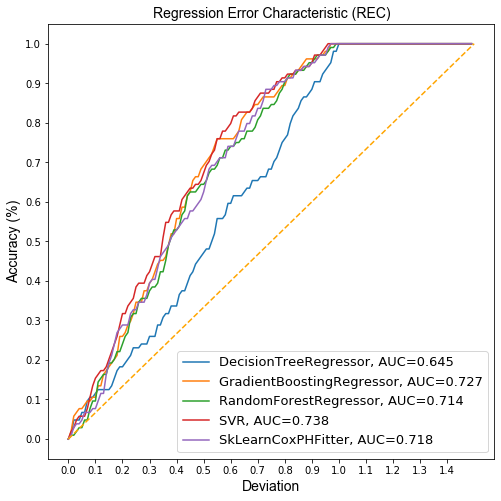

In [24]:
# Instantiate the classfiers and make a list
regressors = [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'),
              GradientBoostingRegressor(n_estimators=70, min_samples_split=30, min_samples_leaf=0.2, 
                                        max_features=100, max_depth=6, learning_rate=0.01), 
              RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 
              SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
                    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
              cph]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'Deviation','Accuracy','AUC'])

# Train the models and record the results
for rls in regressors:
    model = rls.fit(X_important_train, y_train)
    y_pred = model.predict(X_important_test)    
    
    
    def REC(y_test , y_pred):
    
        # initilizing the lists
        Accuracy = []
    
        # initializing the values for Epsilon
        Begin_Range = 0
        End_Range = 1.5
        Interval_Size = 0.01
    
        # List of epsilons
        Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
        
        # Main Loops
        for i in range(len(Epsilon)):
            count = 0.0
            for j in range(len(y_test)):
                if np.linalg.norm(y_test[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_test[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                    count = count + 1
        
            Accuracy.append(count/len(y_test))
    
        # Calculating Area Under Curve using Simpson's rule
        AUC = simps(Accuracy , Epsilon ) / End_Range
        
        # returning epsilon , accuracy , area under curve    
        return Epsilon , Accuracy , AUC

    # finding the deviation and accuracy, and area under curve for plotting
    Deviation, Accuracy, AUC = REC(y_test, y_pred)

    # Calculating R^2 of the true and predicted values
    #RR = r2_score(y_val, y_predval)

    
    result_table = result_table.append({'regressors':rls.__class__.__name__,
                                        'Deviation':Deviation, 
                                        'Accuracy':Accuracy, 
                                        'AUC':AUC}, ignore_index=True)
    
# Set name of the classifiers as index labels
result_table.set_index('regressors', inplace=True)

fig = plt.figure(figsize=(8,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['Deviation'],
            result_table.loc[i]['Accuracy'],
            label="{}, AUC={:.3f}".format(i, result_table.loc[i]['AUC']))
    
        


plt.plot([0,1.5], [0,1], color='orange', linestyle='--')
plt.title("Regression Error Characteristic (REC)", fontdict=font)
#plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xticks(np.arange(0.0, 1.5, step=0.1))
plt.xlabel("Deviation", fontdict=font)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Accuracy (%)", fontdict=font)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\RF\FLUXGENES\AUC_FLUXGENES.pdf', bbox_inches="tight")
plt.show()

In [25]:
# Instantiate the classfiers and make a list
regressors = [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'),
              GradientBoostingRegressor(n_estimators=70, min_samples_split=30, min_samples_leaf=0.2, 
                                        max_features=100, max_depth=6, learning_rate=0.01), 
              RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 
              SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
                    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
              cph]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'MAE','MSE','RMSE', 'rRMSE'])

# Train the models and record the results
for rls in regressors:
    model = rls.fit(X_important_train, y_train)
    y_pred = model.predict(X_important_test)      
    
    # Print result of MAE
          
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    #print(metrics.mean_absolute_error(y_test, y_pred))

    # Print result of MSE
    MSE = metrics.mean_squared_error(y_test, y_pred)
    #print(metrics.mean_squared_error(y_test, y_pred))

    # Print result of RMSE
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    #print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
    def rmse_metric(y_test, y_pred):
        sum_error = 0.0
        for i in range(len(y_test)):
            prediction_error = y_pred[i] - y_test[i]
            sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(y_test))
        return sqrt(mean_error)

    rmse = rmse_metric(y_test, y_pred)

    def meanactual_metric(y_test):
        sum_error = 0.0
        for i in range(len(y_test)):
            prediction_error = y_test[i]
            sum_error += prediction_error
            mean_error = sum_error / float(len(y_test))
        return (mean_error)

    mean = meanactual_metric(y_test)
    rRMSE = rmse/mean

    
    result_table = result_table.append({'regressors':rls.__class__.__name__,
                                        'MAE':MAE, 
                                        'MSE':MSE, 
                                        'RMSE':RMSE,
                                        'rRMSE':rRMSE}, ignore_index=True)
print(result_table)

                  regressors        MAE          MSE       RMSE     rRMSE
0      DecisionTreeRegressor  29.957981  2202.841181  46.934435  1.464981
1  GradientBoostingRegressor  20.331850  1319.935475  36.330916  1.134009
2      RandomForestRegressor  22.608905  1467.792828  38.311784  1.195839
3                        SVR  19.369771  1434.746099  37.878042  1.182300
4         SkLearnCoxPHFitter  22.613761  1316.796313  36.287688  1.132660


In [26]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [27]:
kmf.fit(y_pred, z1_test)

c:\python\python37\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:262: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 104 total observations, 41 right-censored observations>

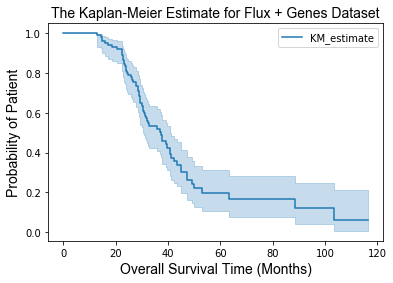

In [28]:
kmf.plot_survival_function()
plt.title("The Kaplan-Meier Estimate for Flux + Genes Dataset", fontdict=font)
plt.xlabel("Overall Survival Time (Months)", fontdict=font)
plt.ylabel("Probability of Patient", fontdict=font)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\RF\FLUXGENES\KM_FLUXGENES.pdf', bbox_inches="tight")

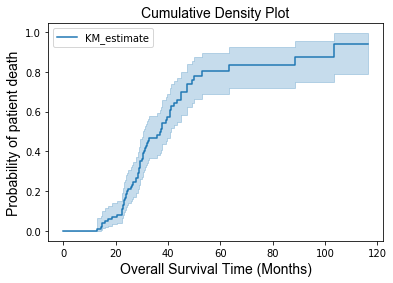

In [29]:
# Plot the cumulative density graph:

kmf.plot_cumulative_density()
plt.title("Cumulative Density Plot", fontdict=font)
plt.xlabel("Overall Survival Time (Months)", fontdict=font)
plt.ylabel("Probability of patient death", fontdict=font)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\RF\FLUXGENES\CUMULATIVEKM_FLUXGENES.pdf', bbox_inches="tight")